<a href="https://colab.research.google.com/github/LuisRodarteSolorzano/Curso-MUFRAMEX/blob/main/Actualizado_Ejemplo_heart_CLASIFICACION_Seleccion_Variables_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este conjunto de datos, a menudo llamado "Heart Disease Data Set", generalmente incluye las siguientes variables:

1. **Edad**: La edad del paciente en años.
2. **Sexo**: El género del paciente, usualmente codificado como 1 = masculino, 0 = femenino.
3. **Tipo de Dolor de Pecho (cp)**: Tipo de dolor de pecho experimentado. Puede tener categorías como típico anginal, atípico anginal, dolor no anginal, o asintomático.
4. **Presión Arterial en Reposo (trestbps)**: La presión arterial del paciente en reposo (en mm Hg al ingreso al hospital).
5. **Colesterol sérico (chol)**: El nivel de colesterol en mg/dl.
6. **Nivel de Azúcar en Sangre en Ayunas (fbs)**: Si el nivel de azúcar en sangre del paciente es mayor a 120 mg/dl (1 = verdadero; 0 = falso).
7. **Resultados Electrocardiográficos en Reposo (restecg)**: Resultados de electrocardiograma en reposo (0 = normal; 1 = teniendo anomalías en la onda ST-T; 2 = mostrando hipertrofia ventricular izquierda).
8. **Frecuencia Cardíaca Máxima Alcanzada (thalach)**: La máxima frecuencia cardíaca alcanzada durante el test de esfuerzo.
9. **Angina Inducida por el Ejercicio (exang)**: Si el ejercicio indujo angina (1 = sí; 0 = no).
10. **Depresión del ST inducida por el ejercicio respecto al reposo (oldpeak)**: Depresión del segmento ST medida en milímetros.
11. **La Pendiente del Segmento ST de Pico del Ejercicio (slope)**: La pendiente del pico del segmento ST del ejercicio (valor numérico).
12. **Número de Vasos Principales coloreados por fluoroscopia (ca)**: Número de vasos principales (0-3) coloreados por fluoroscopia.
13. **Thal**: Un trastorno sanguíneo llamado talasemia (3 = normal; 6 = defecto fijo; 7 = defecto reversible).
14. **Diagnóstico de Enfermedad Cardíaca (target)**: Diagnóstico de enfermedad cardíaca (1 = enfermedad; 0 = no enfermedad).

Este conjunto de datos es ampliamente utilizado para tareas de clasificación, como predecir la presencia de enfermedades cardíacas en pacientes basándose en diversas medidas médicas.

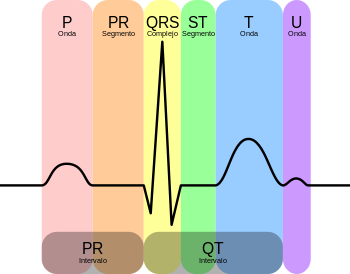

# Lectura de datos

In [ ]:
import matplotlib.pyplot as plt # crear graficos
plt.rcParams["figure.figsize"] = (10,5) # cambiar el tamano de las figuras
import seaborn as sns # graficos con dataframes

import numpy as np # manipulacion de vectores
import pandas as pd # manipulacion de dataframes igual R

import missingno as msno # manipular y visualizar los valores perdidos Nans

from sklearn.feature_selection import mutual_info_classif # calculo de la mutual information o MI

from sklearn.feature_selection import f_classif # calculo de test estadisticos ANOVA
from sklearn.feature_selection import chi2 # calculo del test de chi cuadrado
from sklearn.linear_model import LogisticRegression # calculo de una regresion logistica con sklearn
import statsmodels.api as sm # calculo de regresion logistico mas estadistico tipo R con statsmodels
from sklearn.feature_selection import RFE # algoritmo de quitar variables que no son importantes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_gd = '/content/drive/MyDrive/CURSO MUFRAMEX CIMAT/SESION 2 - MACHINE LEARNING SUPERVISADO/PYTHON PASO A PASO/datos/heart.csv'
data = pd.read_csv(file_gd,header=0)

## Exploración previa

In [ ]:
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
# Numero de filas y observacions
print('Número de filas:')
len(data)

Número de filas:


303

In [ ]:
print('Número de columnas:')
len(data.columns)

Número de columnas:


14

In [ ]:
# Tipos de variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# Tipos de variables: las variables factores o cualitativas son object. Las cuantitativas son int64 o float64
pd.DataFrame(data.dtypes)

,0
age,int64
sex,int64
cp,int64
trtbps,int64
chol,int64
fbs,int64
restecg,int64
thalachh,int64
exng,int64
oldpeak,float64


<Axes: >

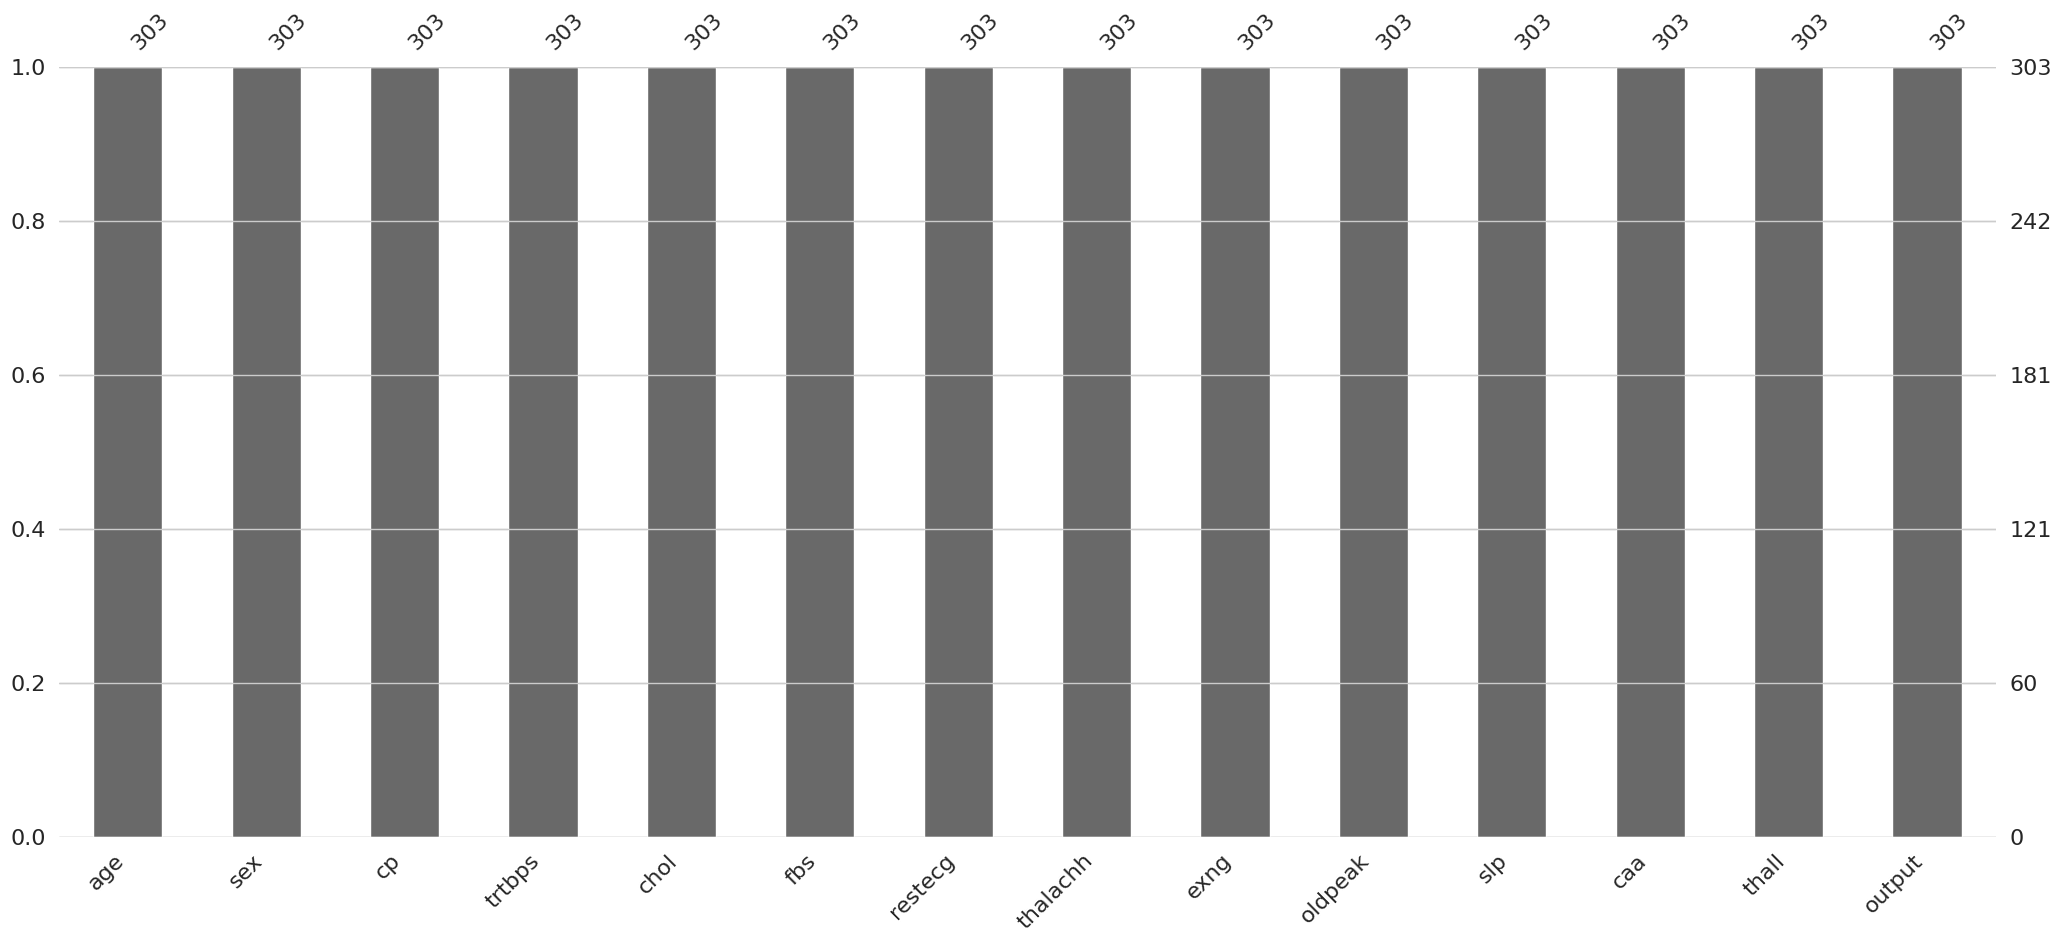

In [ ]:
#import missingno as msno

# Visualize the number of missing
# values as a bar chart
msno.bar(data)

<Axes: >

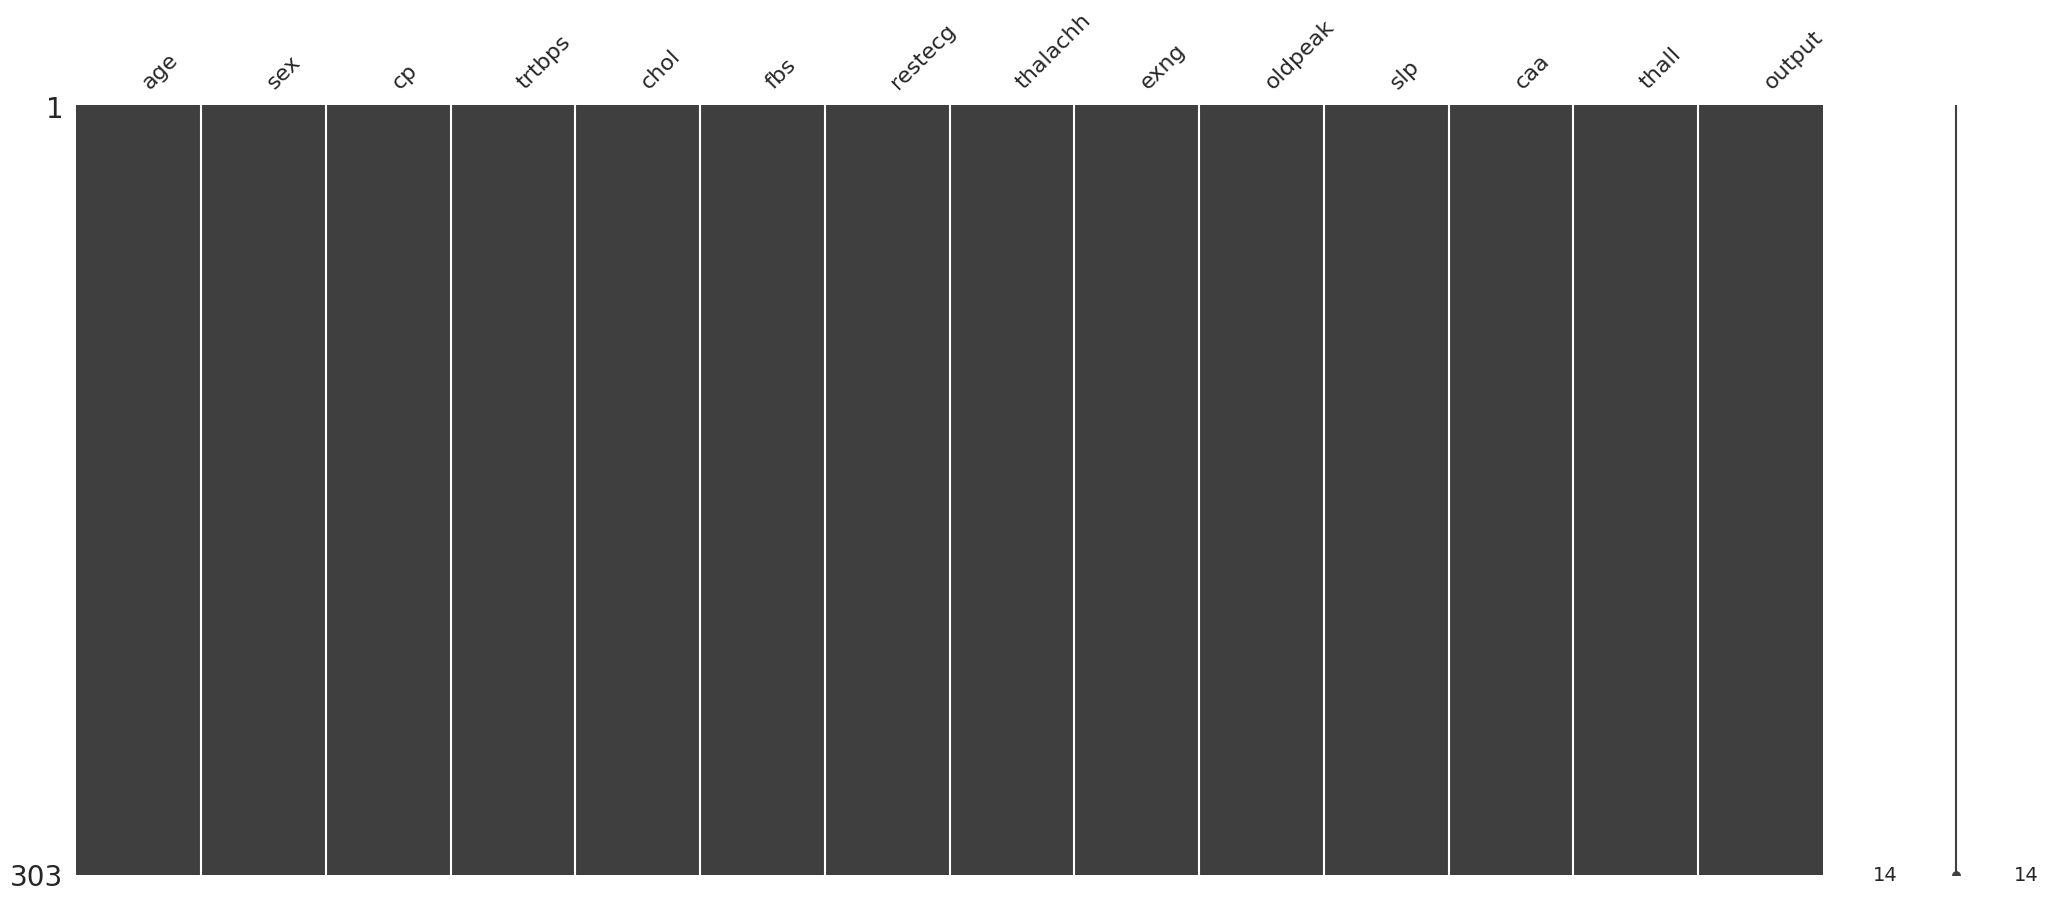

In [ ]:
# Visualize missing values as a matrix
msno.matrix(data)

In [ ]:
# Quitar las filas con nans
# Quitar los NAs
data = data.dropna()
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Transformar tipos de variables

In [ ]:
# @title
# Trasnformar las variables cualitativas (tipo object)
data['sex'] = data['sex'].astype(object)
data['cp'] = data['cp'].astype(object)
data['fbs'] = data['fbs'].astype(object)
data['restecg'] = data['restecg'].astype(object)
data['exng'] = data['exng'].astype(object)
data['slp'] = data['slp'].astype(object)
data['caa'] = data['caa'].astype(object)
data['thall'] = data['thall'].astype(object)
data['output'] = data['output'].astype(object)

# Mirar los nuevos tipos de variables:
pd.DataFrame(data.dtypes)

,0
age,int64
sex,object
cp,object
trtbps,int64
chol,int64
fbs,object
restecg,object
thalachh,int64
exng,object
oldpeak,float64


# Limpieza y ordenación de los datos

## Identificar la variable respuesta

In [ ]:
# Identificar variable respuesta
respuesta = np.array(['output'])
#respuesta = (['output'])
respuesta = respuesta.astype(object)
respuesta

array(['output'], dtype=object)

## Identificar variables explicativas cualitativas

In [ ]:
# Seleccionar todas las variables menos la respuesta:
data.drop(respuesta[0], axis=1).head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# Identificar variables explicativas cualitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
tipos_variables[0]=='object'

age         False
sex          True
cp           True
trtbps      False
chol        False
fbs          True
restecg      True
thalachh    False
exng         True
oldpeak     False
slp          True
caa          True
thall        True
Name: 0, dtype: bool

In [ ]:
# Identificar las variables cualitativas. Juntamos los dos pasos anteriores:
var_cual = data.drop(respuesta[0], axis=1).columns[tipos_variables[0]=='object']
pd.DataFrame(var_cual)

,0
0,sex
1,cp
2,fbs
3,restecg
4,exng
5,slp
6,caa
7,thall


## Identificar variables explicativas numéricas

In [ ]:
# Identificar variables explicativas cuantitativas excepto la respuesta
tipos_variables = pd.DataFrame(data.drop(respuesta[0], axis=1).dtypes)
(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')

age          True
sex         False
cp          False
trtbps       True
chol         True
fbs         False
restecg     False
thalachh     True
exng        False
oldpeak      True
slp         False
caa         False
thall       False
Name: 0, dtype: bool

In [ ]:
# Identificar las variables cuantitativas. Juntamos los dos pasos anteriores:
var_num = data.drop(respuesta[0], axis=1).columns[(tipos_variables[0]=='int64') | (tipos_variables[0]=='float64')]
pd.DataFrame(var_num)

,0
0,age
1,trtbps
2,chol
3,thalachh
4,oldpeak


# Exploración del dataset

## Describir la variable respuesta

In [ ]:
# Tabla de frecuencias absolutas:
data[respuesta[0]].value_counts()

1    165
0    138
Name: output, dtype: int64

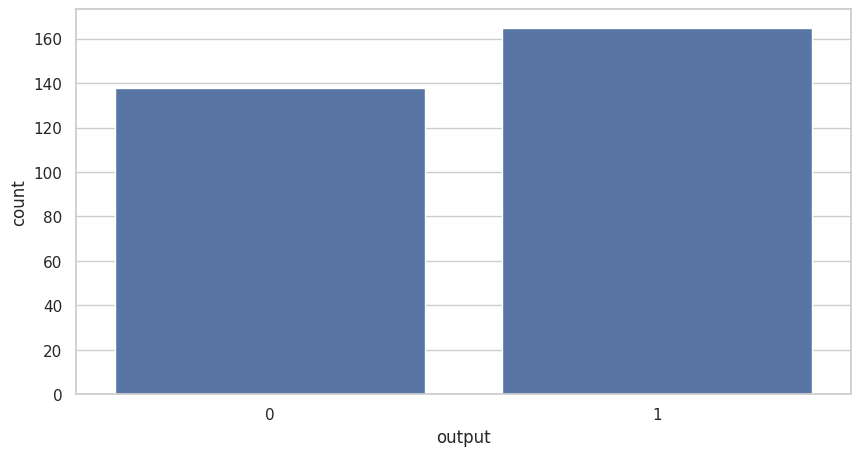

In [ ]:
# Barplot de la variable output- frecuencias absolutas
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=respuesta[0],data = data)

In [ ]:
# Tabla de frecuencias relativas:
# [1B] By percent
pct = data[respuesta[0]].value_counts(normalize=True).reset_index().rename({'index':respuesta[0],respuesta[0]:'percent'}, axis=1)
pct


,output,percent
0,1,0.544554
1,0,0.455446


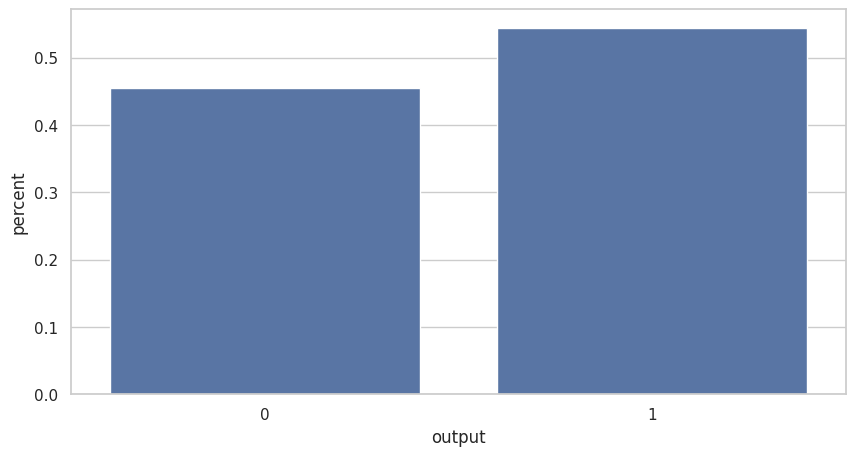

In [ ]:
# Barplot de frecuencias relativas
sns.barplot(x=respuesta[0], y='percent', data=pct)
plt.show()

## Descripción de variables cuantitativas de entrada

In [ ]:
# Descripcion numericas / estadisticos descriptivos:
data[var_num].describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


<ipython-input-49-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


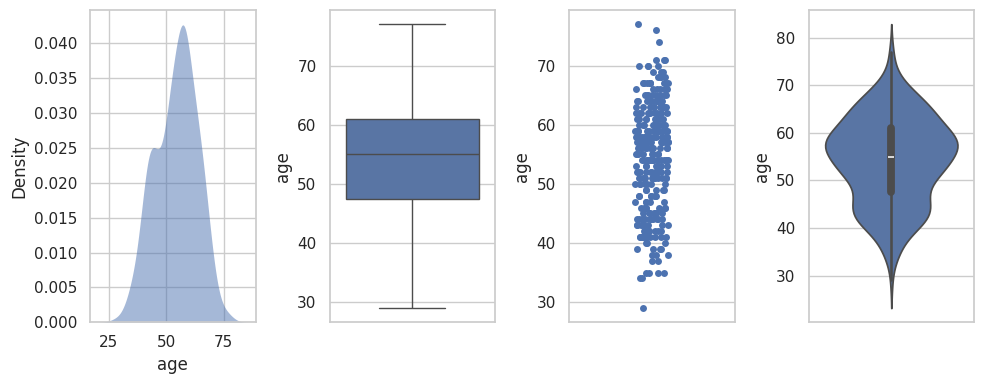

<ipython-input-49-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


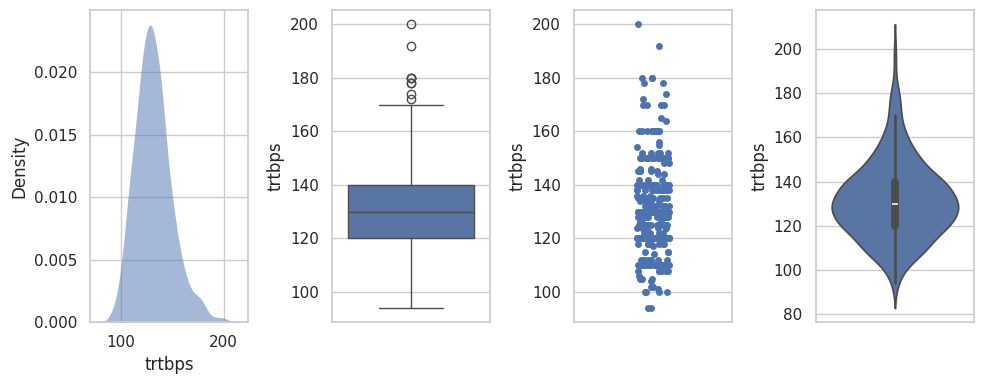

<ipython-input-49-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


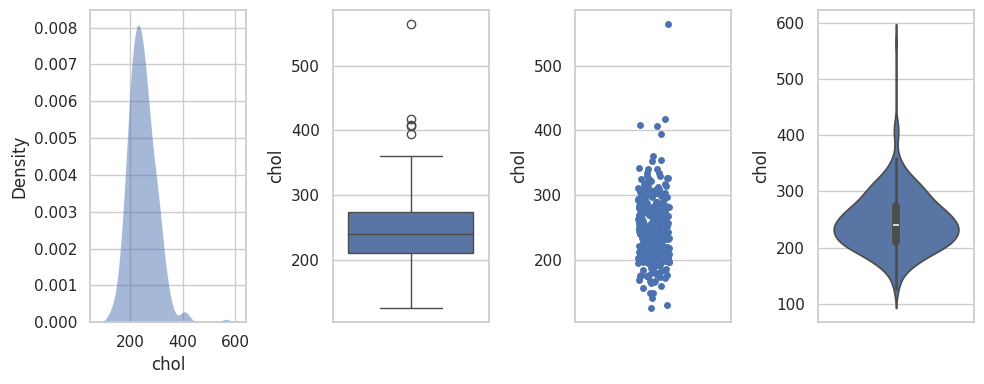

<ipython-input-49-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


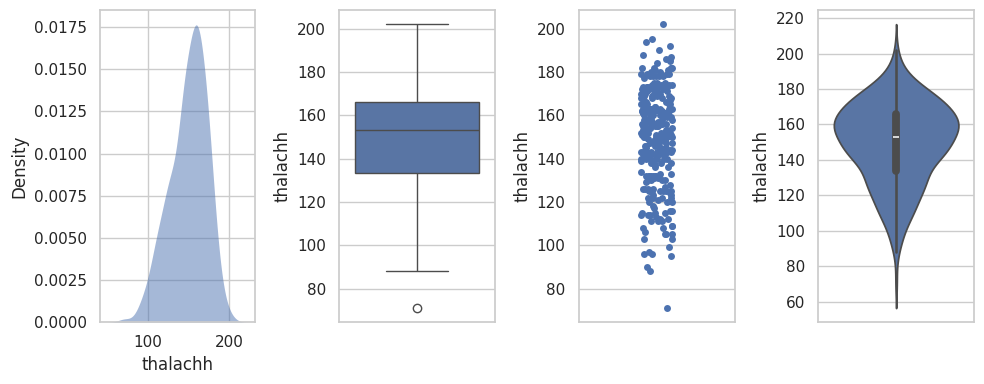

<ipython-input-49-efe5908e5291>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(


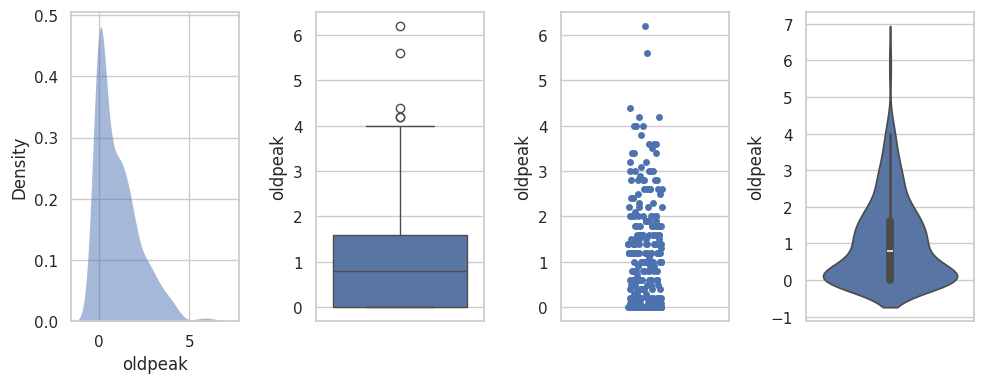

In [ ]:
# Histograma de densidad, boxplot, stripchart y violin plot:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i,
       fill=True, common_norm=False, palette="crest",
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i,ax=axs[1])
    sns.stripplot(y= i,data=data,ax=axs[2])
    sns.violinplot(data=data, y=i,ax=axs[3])
    fig.tight_layout()
    plt.show()

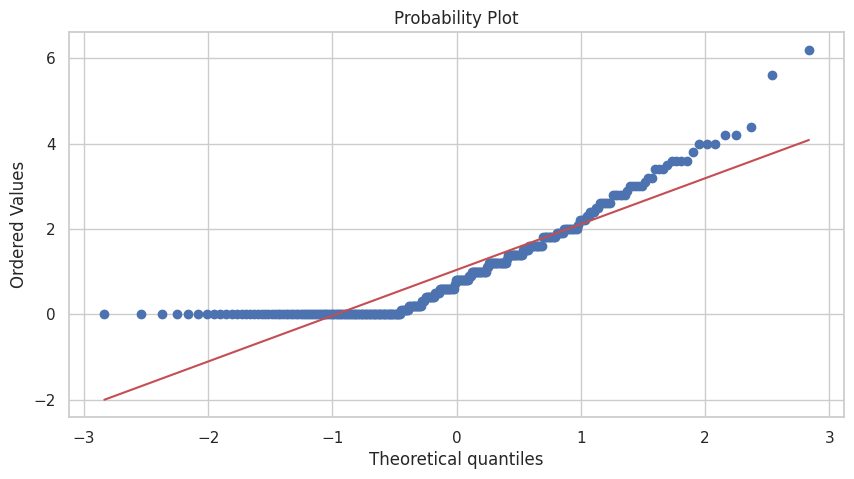

In [ ]:
# Ejemplo de qqplot por si quieres introducirlo en el for:
import scipy.stats as stats
import pylab as py
stats.probplot(data['oldpeak'], dist="norm", plot=plt)
py.show()

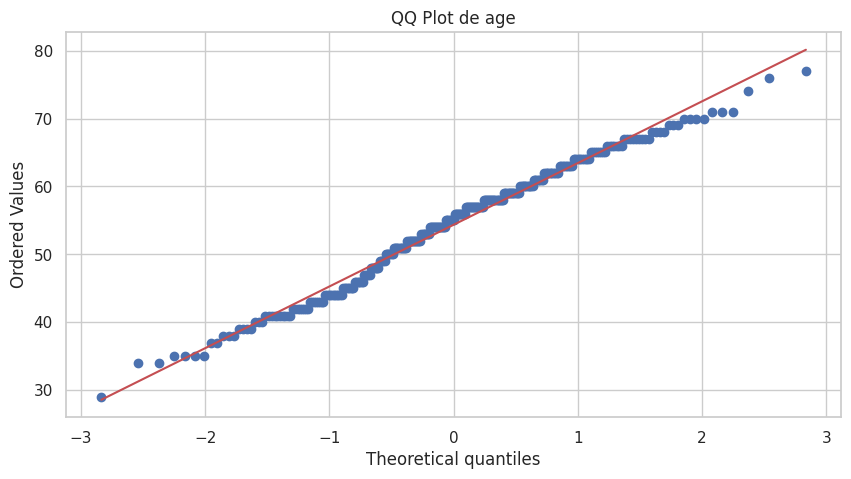

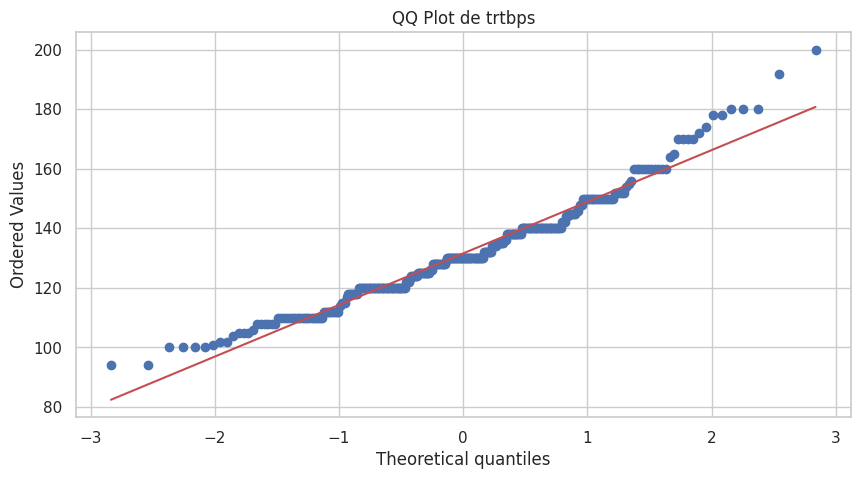

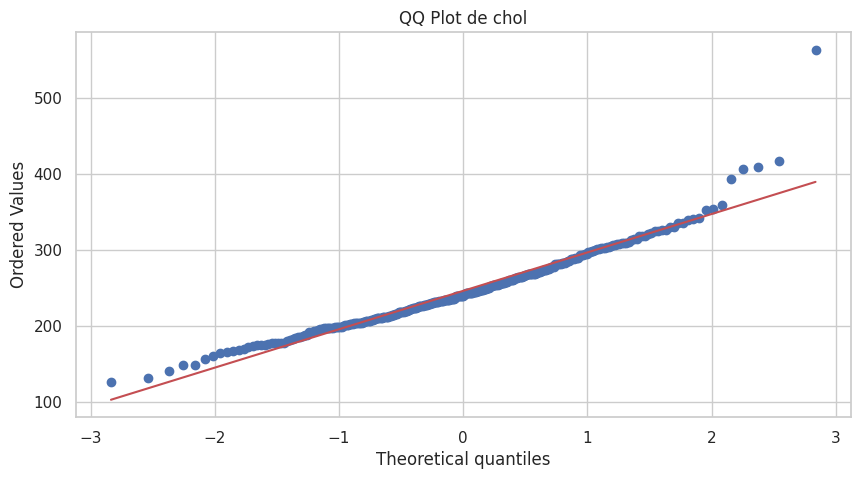

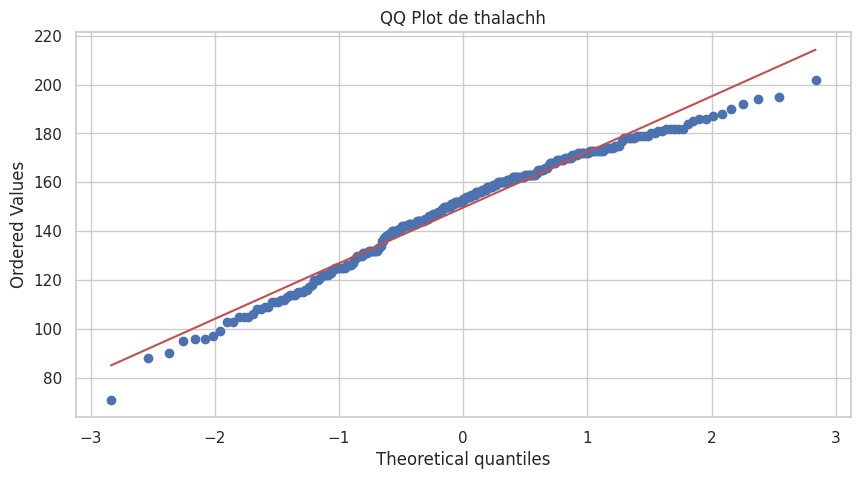

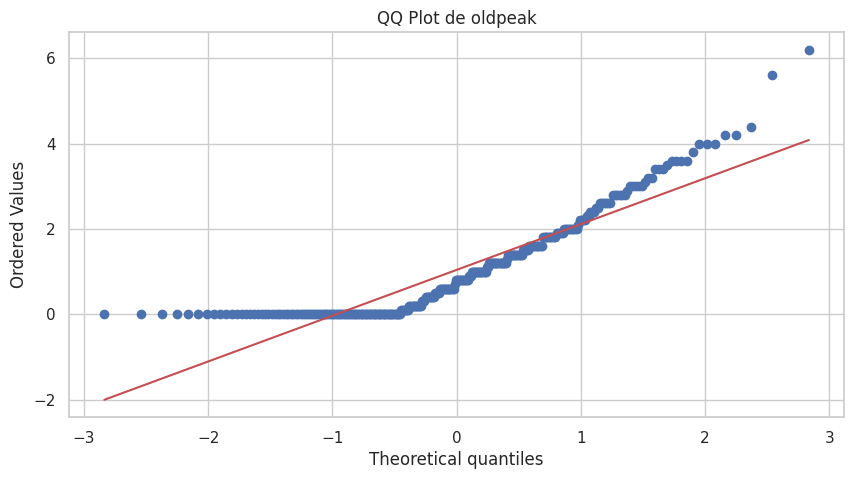

In [ ]:
# Ejemplo de qqplot por si quieres introducirlo en el for:
import scipy.stats as stats
import pylab as py

for i in var_num:
    stats.probplot(data[i], dist="norm", plot=plt)
    plt.title(f'QQ Plot de {i}')  # Añadir un título, 'i' es el nombre de la variable actual
    py.show()

## Descripción variables cualitativas

Tabla de frecuencias absolutas:
1    207
0     96
Name: sex, dtype: int64
Tabla de frecuencias porcentaje:
   sex   percent
0    1  0.683168
1    0  0.316832


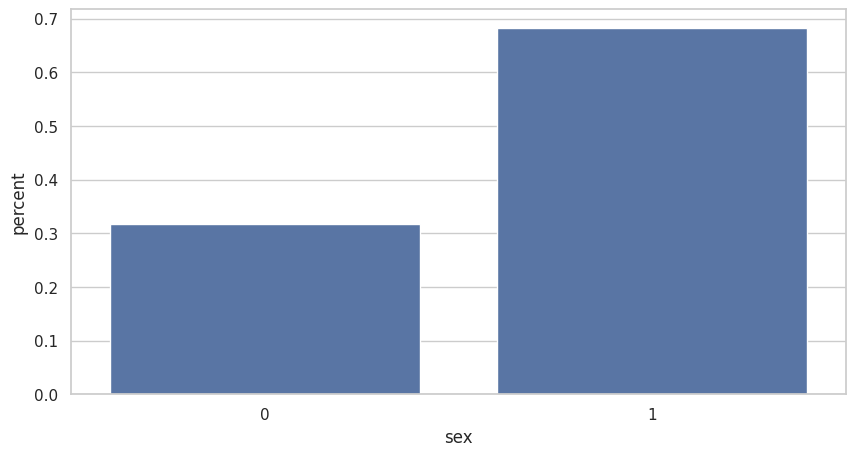

Tabla de frecuencias absolutas:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
Tabla de frecuencias porcentaje:
   cp   percent
0   0  0.471947
1   2  0.287129
2   1  0.165017
3   3  0.075908


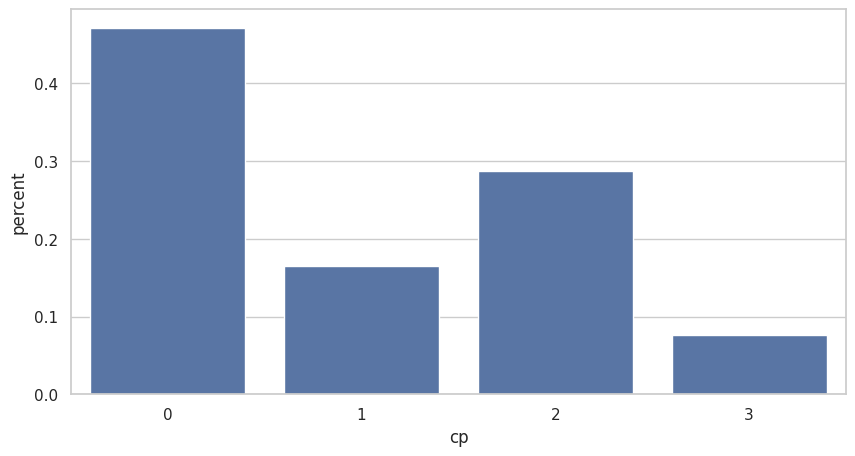

Tabla de frecuencias absolutas:
0    258
1     45
Name: fbs, dtype: int64
Tabla de frecuencias porcentaje:
   fbs   percent
0    0  0.851485
1    1  0.148515


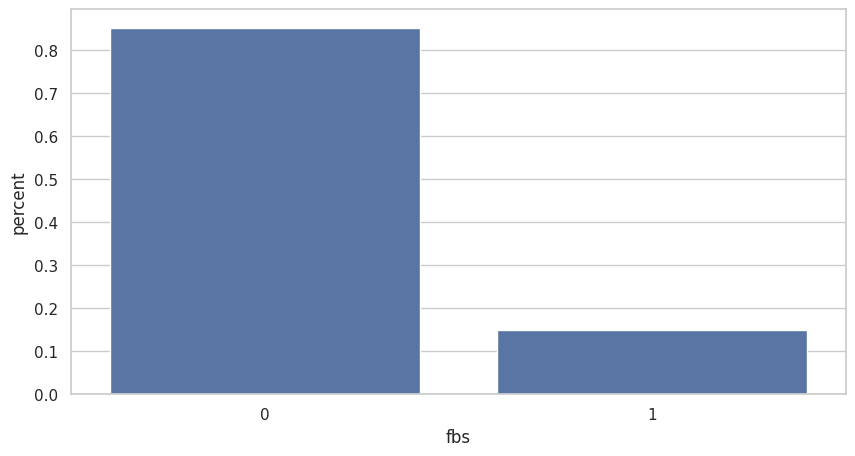

Tabla de frecuencias absolutas:
1    152
0    147
2      4
Name: restecg, dtype: int64
Tabla de frecuencias porcentaje:
   restecg   percent
0        1  0.501650
1        0  0.485149
2        2  0.013201


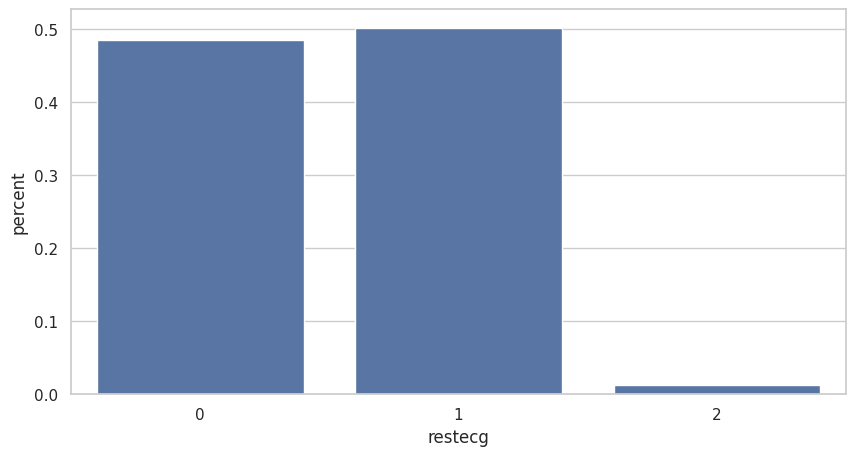

Tabla de frecuencias absolutas:
0    204
1     99
Name: exng, dtype: int64
Tabla de frecuencias porcentaje:
   exng   percent
0     0  0.673267
1     1  0.326733


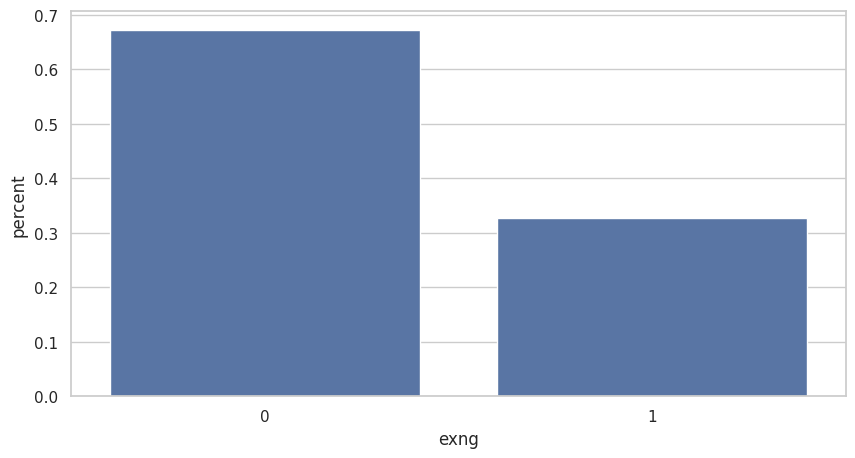

Tabla de frecuencias absolutas:
2    142
1    140
0     21
Name: slp, dtype: int64
Tabla de frecuencias porcentaje:
   slp   percent
0    2  0.468647
1    1  0.462046
2    0  0.069307


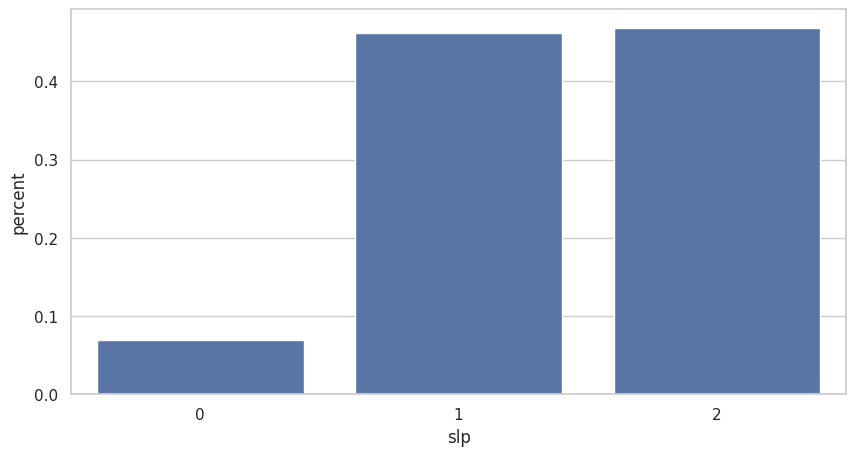

Tabla de frecuencias absolutas:
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
Tabla de frecuencias porcentaje:
   caa   percent
0    0  0.577558
1    1  0.214521
2    2  0.125413
3    3  0.066007
4    4  0.016502


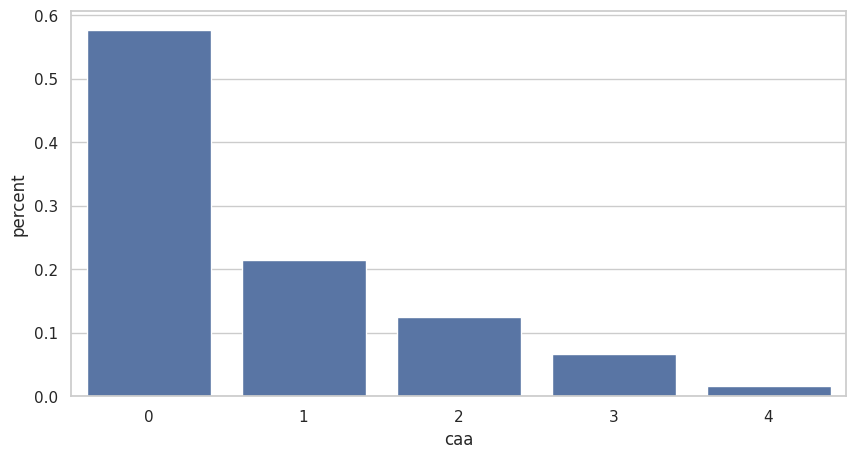

Tabla de frecuencias absolutas:
2    166
3    117
1     18
0      2
Name: thall, dtype: int64
Tabla de frecuencias porcentaje:
   thall   percent
0      2  0.547855
1      3  0.386139
2      1  0.059406
3      0  0.006601


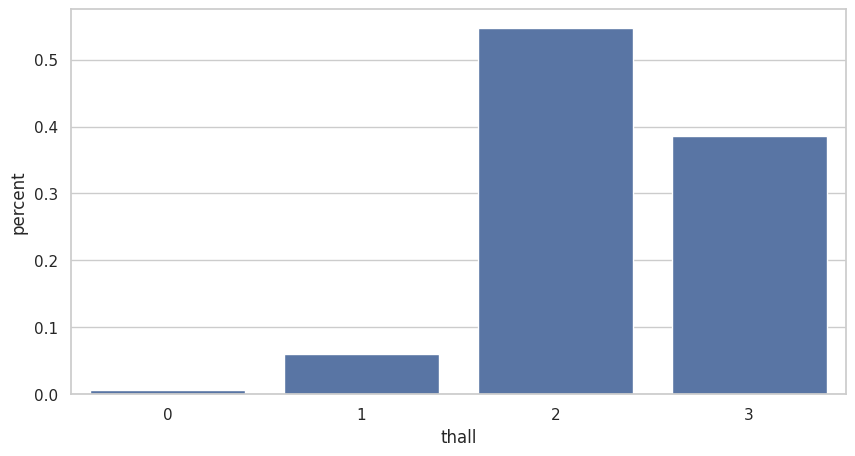

In [ ]:
# Mostrar graficos y tablas de todas las variables cualitativas
for i in var_cual:
    print('Tabla de frecuencias absolutas:')
    print(data[i].value_counts())
    print('Tabla de frecuencias porcentaje:')
    pct = data[i].value_counts(normalize=True).reset_index().rename({'index':i,i:'percent'}, axis=1)
    print(pct)
    sns.barplot(x=i, y='percent', data=pct)
    plt.show()

# Descripción mutivariada

## Separamos variables de entrada y salida

In [ ]:
X_tot = data.drop(respuesta[0], axis=1) # variables de entrada TODAS sin la salida

X_cual = data.drop(var_num, axis=1)
X_cual = X_cual.drop(respuesta[0], axis=1) # variables cualitativas sin la salida

X_num = data.drop(var_cual, axis=1)
X_num = X_num.drop(respuesta[0], axis=1) # variables cuantitativas sin la salida

y = data[respuesta[0]] # variable de salida

## Variables numéricas vs la salida:

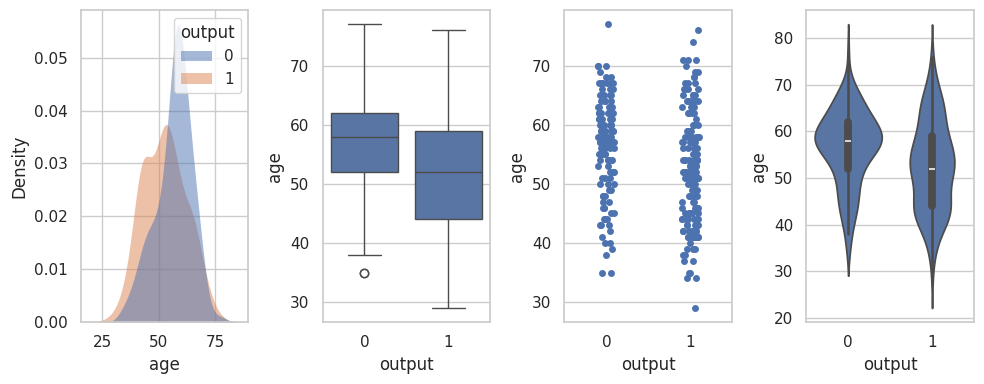

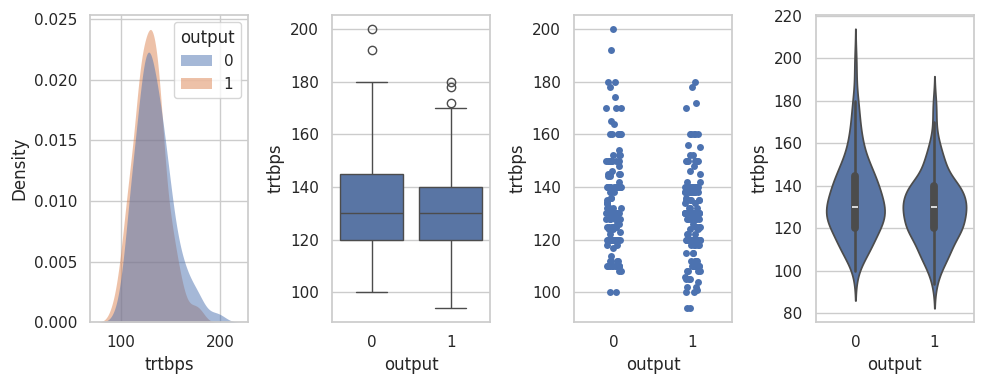

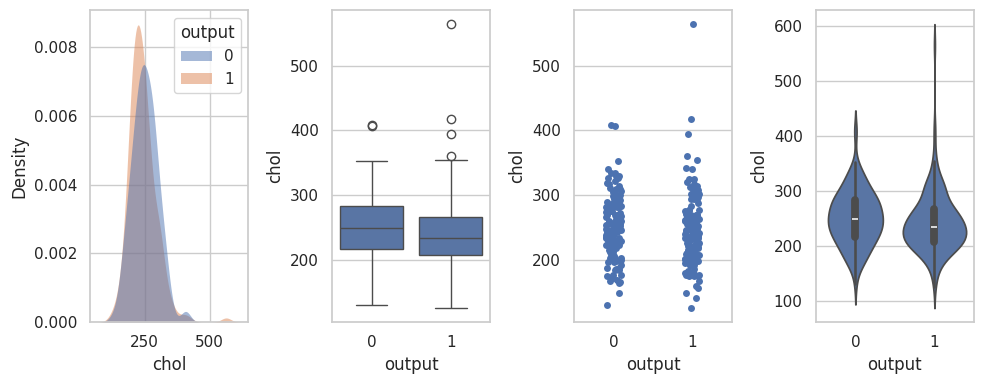

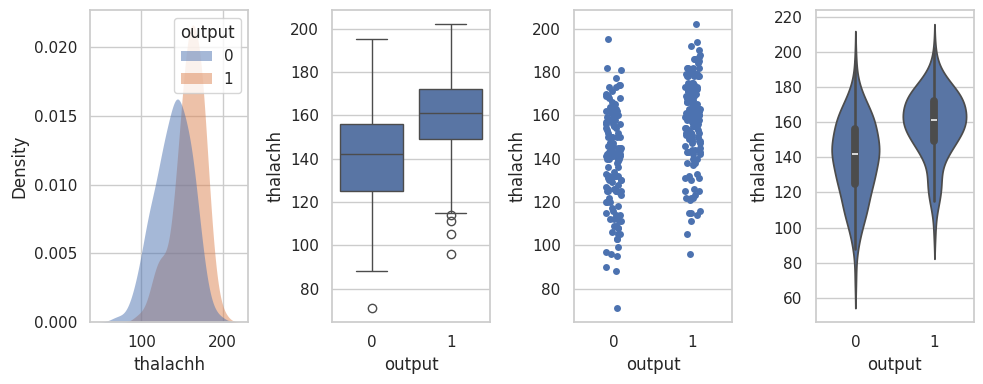

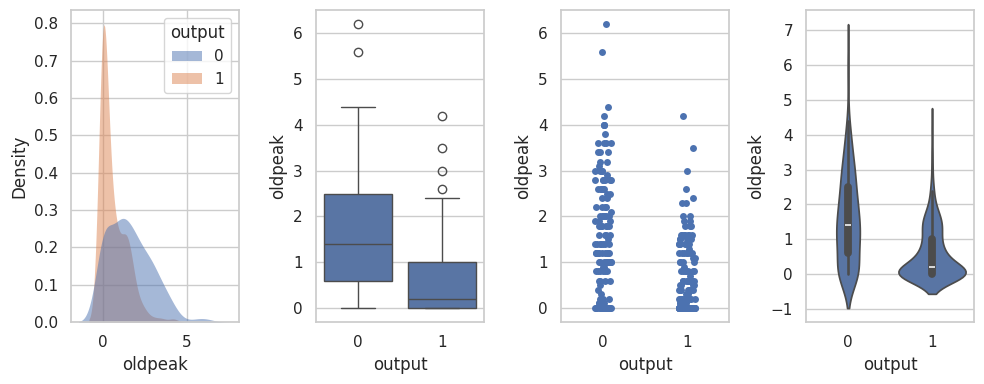

In [ ]:
# Distribuciones de las variables de numericas de entrada vs la salida:
for i in var_num:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    sns.kdeplot(
       data=data, x=i, hue=respuesta[0],
       fill=True, common_norm=False,
       alpha=.5, linewidth=0, ax=axs[0])
    sns.boxplot(data=data, y=i, x=respuesta[0],ax=axs[1])
    sns.stripplot(y= i,data=data, x =respuesta[0],ax=axs[2])
    sns.violinplot(data=data, y=i, x=respuesta[0],ax=axs[3])
    fig.tight_layout()
    plt.show()

In [ ]:
# Descripcion numerica de las variables numericas por grupo de la respuesta
df1=(data.drop(var_cual, axis=1).groupby(respuesta[0])
         .describe()
         .unstack()
         .unstack(1)
         .reindex(data.columns[1:], level=0))
df1

count        mean        std    min     25%    50%     75%  \
         output                                                               
trtbps   0       138.0  134.398551  18.729944  100.0  120.00  130.0  144.75   
         1       165.0  129.303030  16.169613   94.0  120.00  130.0  140.00   
chol     0       138.0  251.086957  49.454614  131.0  217.25  249.0  283.00   
         1       165.0  242.230303  53.552872  126.0  208.00  234.0  267.00   
thalachh 0       138.0  139.101449  22.598782   71.0  125.00  142.0  156.00   
         1       165.0  158.466667  19.174276   96.0  149.00  161.0  172.00   
oldpeak  0       138.0    1.585507   1.300340    0.0    0.60    1.4    2.50   
         1       165.0    0.583030   0.780683    0.0    0.00    0.2    1.00   

                   max  
         output         
trtbps   0       200.0  
         1       180.0  
chol     0       409.0  
         1       564.0  
thalachh 0       195.0  
         1       202.0  
oldpeak  0         6.2  
         1         4.2

## Variables cualitativas vs la salida

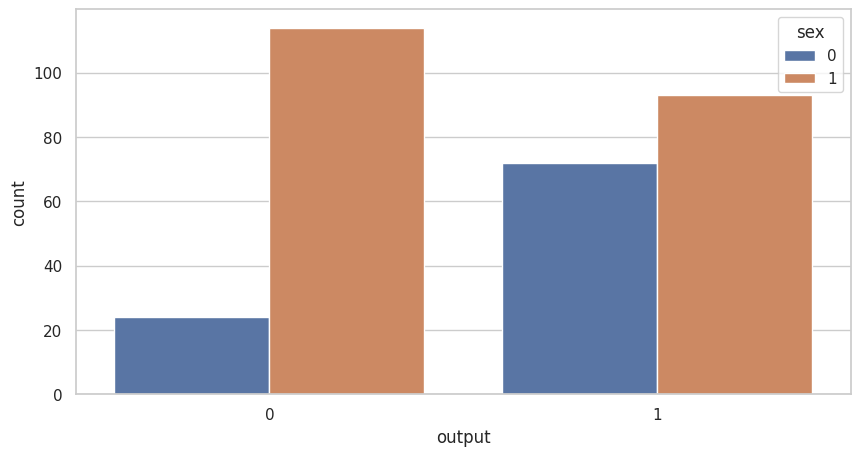

In [ ]:
# Ejemplo Barplot de la variable de entrada vs salida
sns.countplot(x=respuesta[0], hue=var_cual[0], data=data)
plt.show()

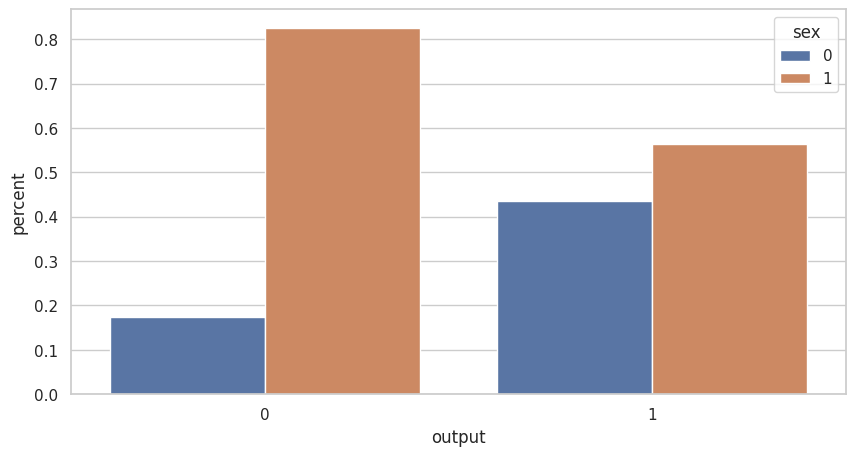

In [ ]:
# Ejemplo Porcentaje relatico a los grupos de la salida
pct2 = (data.groupby([respuesta[0],var_cual[0]]).size() / data.groupby([respuesta[0]]).size()).reset_index().rename({0:'percent'}, axis=1)
sns.barplot(x=respuesta[0], hue=var_cual[0], y='percent', data=pct2)
plt.show()

Tabla de frecuencias absolutas:
1    207
0     96
Name: sex, dtype: int64
Tabla de frecuencias porcentaje:
   output  sex   percent
0       0    0  0.173913
1       0    1  0.826087
2       1    0  0.436364
3       1    1  0.563636


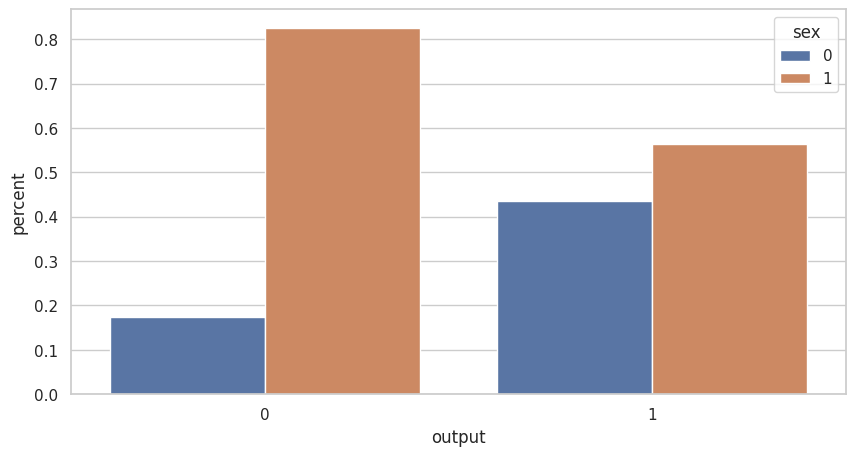

Tabla de frecuencias absolutas:
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
Tabla de frecuencias porcentaje:
   output  cp   percent
0       0   0  0.753623
1       0   1  0.065217
2       0   2  0.130435
3       0   3  0.050725
4       1   0  0.236364
5       1   1  0.248485
6       1   2  0.418182
7       1   3  0.096970


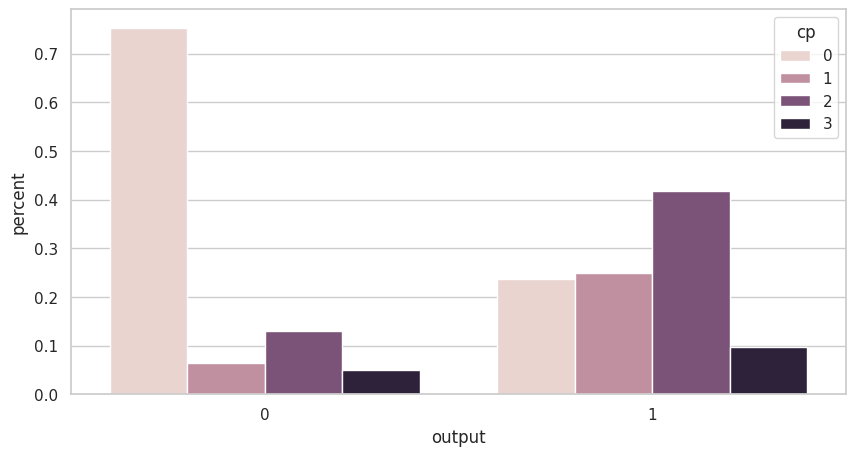

Tabla de frecuencias absolutas:
0    258
1     45
Name: fbs, dtype: int64
Tabla de frecuencias porcentaje:
   output  fbs   percent
0       0    0  0.840580
1       0    1  0.159420
2       1    0  0.860606
3       1    1  0.139394


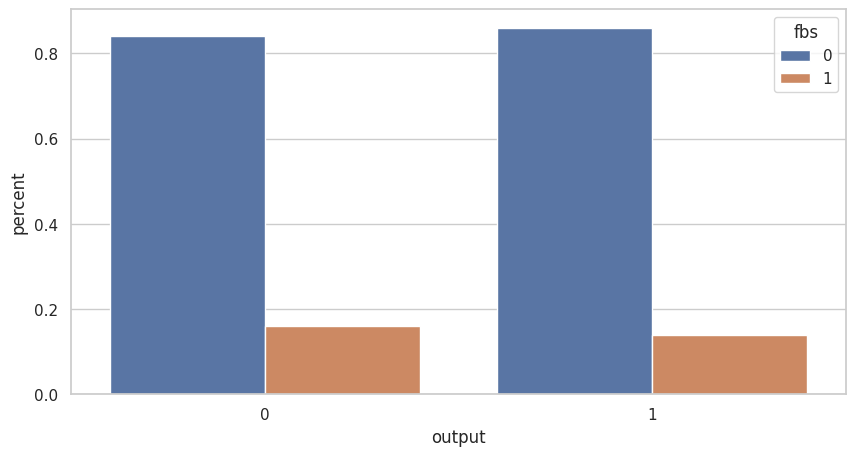

Tabla de frecuencias absolutas:
1    152
0    147
2      4
Name: restecg, dtype: int64
Tabla de frecuencias porcentaje:
   output  restecg   percent
0       0        0  0.572464
1       0        1  0.405797
2       0        2  0.021739
3       1        0  0.412121
4       1        1  0.581818
5       1        2  0.006061


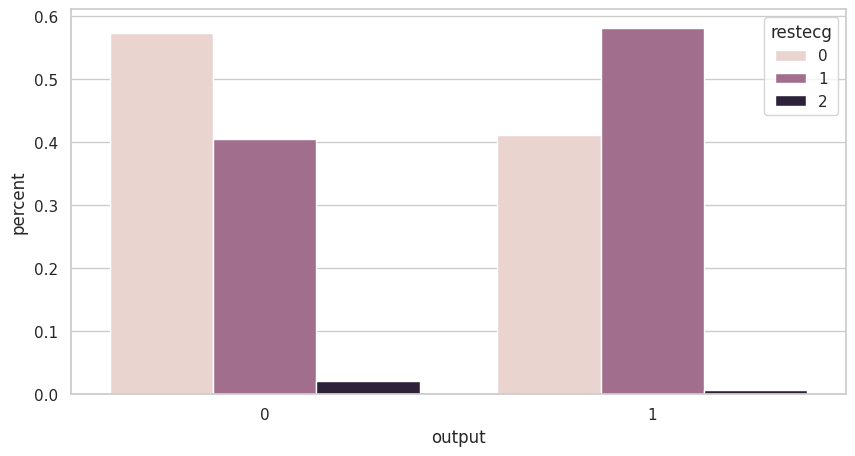

Tabla de frecuencias absolutas:
0    204
1     99
Name: exng, dtype: int64
Tabla de frecuencias porcentaje:
   output  exng   percent
0       0     0  0.449275
1       0     1  0.550725
2       1     0  0.860606
3       1     1  0.139394


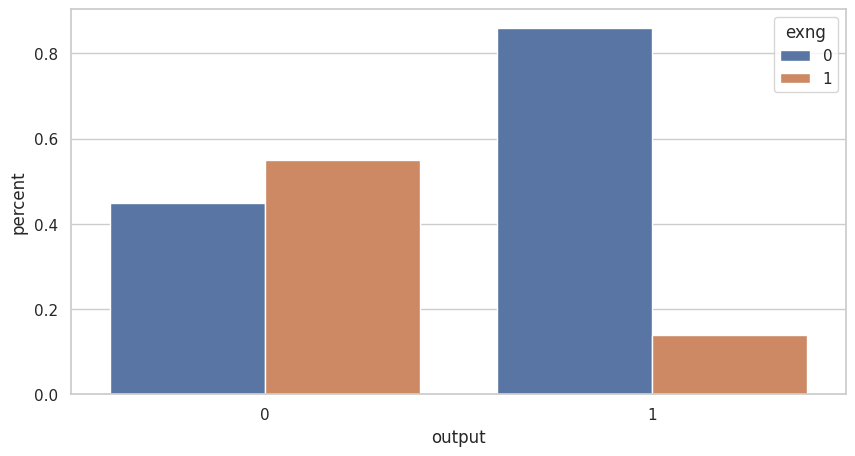

Tabla de frecuencias absolutas:
2    142
1    140
0     21
Name: slp, dtype: int64
Tabla de frecuencias porcentaje:
   output  slp   percent
0       0    0  0.086957
1       0    1  0.659420
2       0    2  0.253623
3       1    0  0.054545
4       1    1  0.296970
5       1    2  0.648485


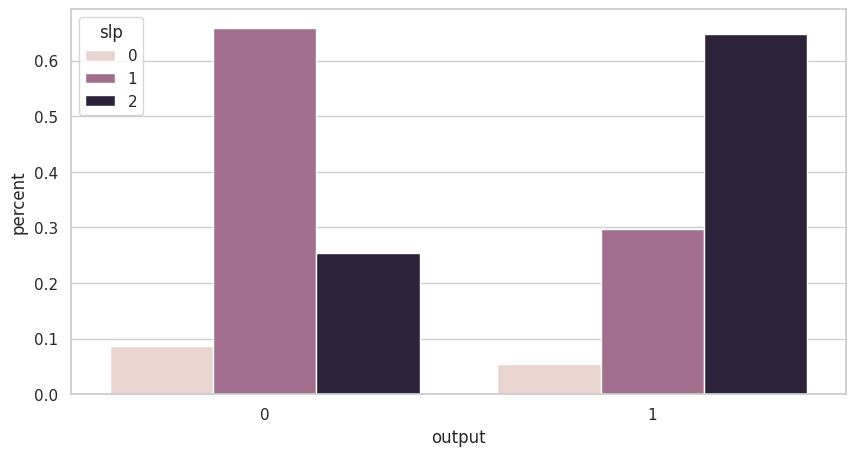

Tabla de frecuencias absolutas:
0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64
Tabla de frecuencias porcentaje:
   output  caa   percent
0       0    0  0.326087
1       0    1  0.318841
2       0    2  0.224638
3       0    3  0.123188
4       0    4  0.007246
5       1    0  0.787879
6       1    1  0.127273
7       1    2  0.042424
8       1    3  0.018182
9       1    4  0.024242


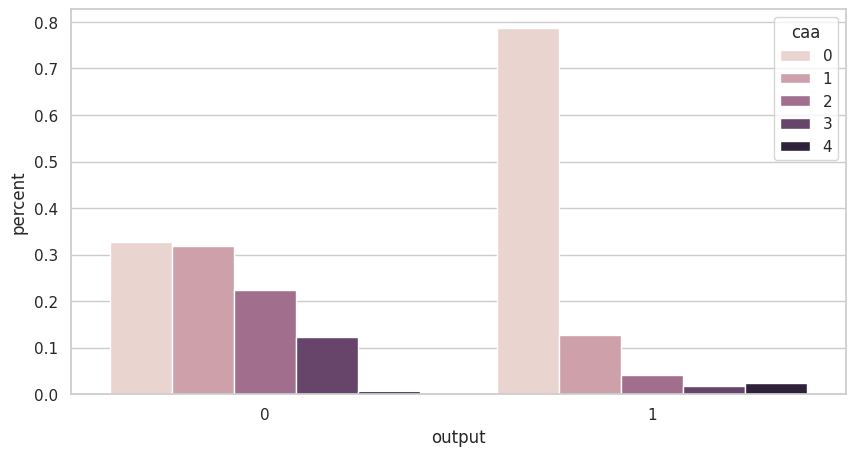

Tabla de frecuencias absolutas:
2    166
3    117
1     18
0      2
Name: thall, dtype: int64
Tabla de frecuencias porcentaje:
   output  thall   percent
0       0      0  0.007246
1       0      1  0.086957
2       0      2  0.260870
3       0      3  0.644928
4       1      0  0.006061
5       1      1  0.036364
6       1      2  0.787879
7       1      3  0.169697


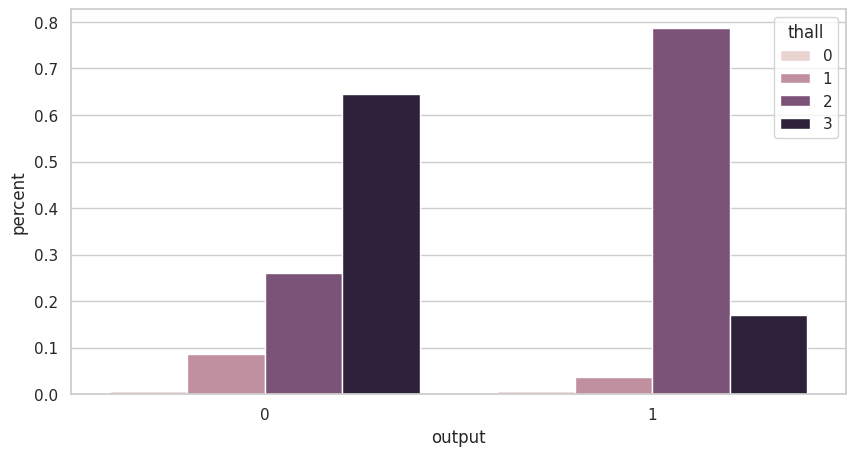

In [ ]:
# Ejemplo variables de entrada cualitativas vs salida
# Mostrar graficos y tablas de todas las variables cualitativas
for i in var_cual:
    print('Tabla de frecuencias absolutas:')
    print(data[i].value_counts())
    print('Tabla de frecuencias porcentaje:')
    pct2 = (data.groupby([respuesta[0],i]).size() / data.groupby([respuesta[0]]).size()).reset_index().rename({0:'percent'}, axis=1)
    print(pct2)
    sns.barplot(x=respuesta[0], hue=i, y='percent', data=pct2)
    plt.show()

# Selección del data frame de entrada y salida

In [ ]:
# Load libraries
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix

# Funciones para el training y validación de los algoritmos
from sklearn.preprocessing import StandardScaler # Estandarizar los datos
from sklearn.model_selection import train_test_split # Split de los datos en training y test
from sklearn.model_selection import KFold # Validación por por subconjuntos.
from sklearn.model_selection import cross_val_score # Métricas de la validación cruzada
from sklearn.model_selection import GridSearchCV # Optimizar los hiperparámetros
from sklearn.metrics import classification_report # Report de la classificación (métricas de clasificación)
from sklearn.metrics import confusion_matrix # Matriz de confusión
from sklearn.metrics import accuracy_score # Accuracy
from sklearn.pipeline import Pipeline # Operador para entrenar, estandarizar + modelo

# Modelos o algoritmos que voy a aplicar
# Algoritmos de baseline, simples.
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Algoritmos más avanzados que requieren más datos pero más potentes.
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
# Seleccionar variables de entrada y variable de salida y pasarlas a numericas:

X_ = X_tot.apply(pd.to_numeric, errors='ignore') # variables de entrada (Se pasan todas a numeros)
y_ = y.astype('int64') # cambiar el tipo de variable a numerica

# Feature selection - selección variables

1. Feature selection univariada ( ANOVA/Kruskall Wallis = Cuantitativa vs salida o  Chi Cuadrado = Cualitativas vs salida, MI = Mutual information)

- Quitar las variables con MI = 0
- Quitar las variables con p-valores >25% = 0.25


2. Feature selection multivariado:
- RFE - recursive feature elimination RANDOM FOREST
- Modelo logístico (caso binario) mejor modelo según el BIC. --> con pocos datos y pocas variables
- Boruta - rfe mejorado

## Filtro univariado - comparación de medias o medianas

Tenemos dos opciones:
- Comparar medias: ANOVA
- Comparar medianas: Kruskal Wallis

In [ ]:
#from sklearn.feature_selection import f_classif

## ANOVA
c = np.array(f_classif(X_num,y))
d = X_num.columns

anova = pd.DataFrame(np.transpose(c), index = d, columns = ["f_statistic","p_value"])
anova.sort_values(by = ["p_value"], ascending = 1)

,f_statistic,p_value
oldpeak,68.551439,4.085346e-15
thalachh,65.120104,1.697338e-14
age,16.116700,7.524801e-05
trtbps,6.458169,1.154606e-02
chol,2.202983,1.387903e-01


## Filtro univariado - Mutual Information (MI)

In [ ]:
#from sklearn.feature_selection import mutual_info_classif

a = mutual_info_classif(X_tot,y.astype('int64'))
b = X_tot.columns
mutualinfo = pd.DataFrame(a,b,columns =["Mutual_Information"])
mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)

,Mutual_Information
thall,0.138766
caa,0.125899
cp,0.124059
slp,0.114882
oldpeak,0.088282
thalachh,0.082542
exng,0.082307
chol,0.076352
sex,0.046388
fbs,0.005961


<ipython-input-48-5c2368f36980>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],


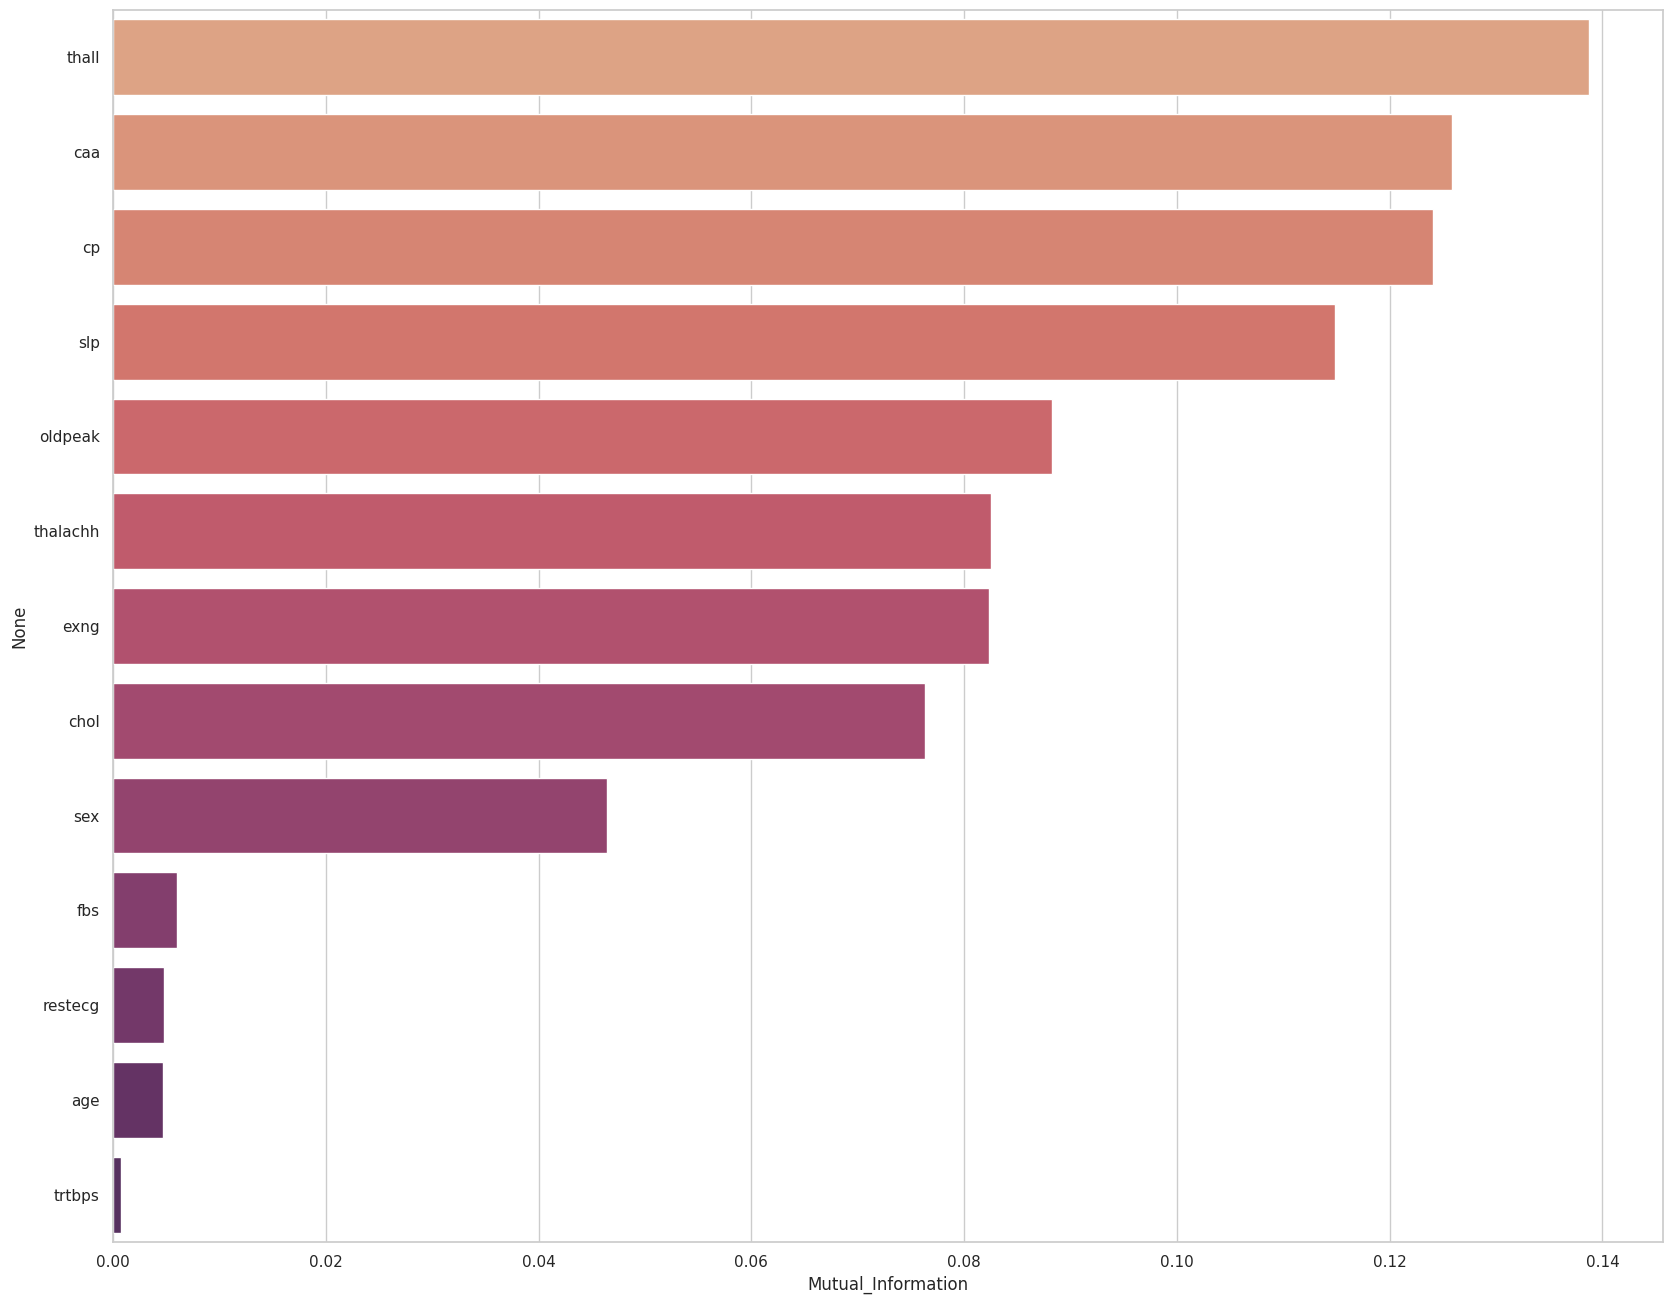

In [ ]:
# Plot de la mutual information
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 16))
sns.barplot(x = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False)["Mutual_Information"],
            y = mutualinfo.sort_values(by=["Mutual_Information"],ascending = False).index,
            palette ="flare",
            data=mutualinfo)
plt.show()

## Filtro univariado - asocioar proporciones

In [ ]:
#from sklearn.feature_selection import chi2

## Chi Squares
c = np.array(chi2(X_cual,y.astype('int64')))
d = X_cual.columns

chi = pd.DataFrame(np.transpose(c), index = d, columns = ["Chi_statistic","p_value"])
chi.sort_values(by = ["p_value"], ascending = 1)

,Chi_statistic,p_value
caa,66.440765,3.605677e-16
cp,62.598098,2.534982e-15
exng,38.914377,4.428074e-10
slp,9.804095,1.741237e-03
sex,7.576835,5.912318e-03
thall,5.791853,1.610061e-02
restecg,2.978271,8.438939e-02
fbs,0.202934,6.523632e-01


## Conclusión del filtro univariado de variables

Las variables que podemos quitar según el ANOVA son: Chol

Las variables que podemos quitar según el Chi Cuadrado son: fbs

Las variables que podemos quitar según MI: age, fbs

## Filtro multivariado: mejor modelo logístico según el BIC

Primero calculamos un modelo logístico solo aplicable cuando tienes un problema binario. A veces el modelo logístico puede ser inestable porque tenemos pocos datos o porque simplemento con las variables de entrada no podemos calcular un modelo logístico robusto.

Un primer paso opcional es calcular el modelo logístico con TODAS las variables o esas que has selecciondo en el filtro univariado.

In [ ]:
# modelo logístico inicial con el paquete sklearn
# from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_,y_)
print("Accuracy del modelo:")
clf.score(X_, y_)

Accuracy del modelo:


0.8481848184818482

In [ ]:
# Modelo logistico con stats model:
# import statsmodels.api as sm

logit_model = sm.Logit(y_, sm.add_constant(X_)).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  303
Model:                          Logit   Df Residuals:                      289
Method:                           MLE   Df Model:                           13
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.4937
Time:                        10:10:07   Log-Likelihood:                -105.72
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 7.262e-37
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4505      2.571      1.342      0.180      -1.590       8.490
age           -0.0049      0.023     -0.212      0.832      -0.050       0.041
sex           -1.7582      0.469     -3.751      0.000      -2.677      -0.839
cp             0.8599      0.185      4.638      0.000       0.496       1.223
trtbps        -0.0195      0.010     -1.884      0.060      -0.040       0.001
chol          -0.0046      0.004     -1.224      0.221      -0.012       0.003
fbs            0.0349      0.529      0.066      0.947      -1.003       1.073
restecg        0.4663      0.348      1.339      0.181      -0.216       1.149
thalachh       0.0232      0.010      2.219      0.026       0.003       0.044
exng          -0.9800      0.410     -2.391      0.017      -1.783      -0.177
oldpeak       -0.5403      0.214     -2.526      0.012      -0.959      -0.121
slp            0.5793      0.350      1.656      0.098      -0.106       1.265
caa           -0.7733      0.191     -4.051      0.000      -1.147      -0.399
thall         -0.9004      0.290     -3.104      0.002      -1.469      -0.332
==============================================================================
"""

In [ ]:
# Calculo del BIC
logit_model.bic

291.4282314674666

El siguiente paso es calcular el modelo logístico cogiendo esas variables según el BIC.

En este caso estamos aplicando un RFE (Recursive Feature elimination) para seleccionar las variables óptimas de cada iteración.


In [ ]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

BIC_models = pd.DataFrame(0, index=range(len(X_.columns)-1), columns = ["Num_Variables","BIC"])
logreg = LogisticRegression()


# Calculo del BIC con la iteracion i-esima
for i in np.arange(1,len(X_.columns),1):
    # Aplicar el RFE con i-variables
    rfe = RFE(logreg,i)
    rfe = rfe.fit(X_,y_)
    print(rfe.support_)
    print(rfe.ranking_)

    # Seleccionar las variables de entrada
    X_RFE = X_[X_.columns[rfe.support_]]
    X_RFE.head()

    # Calcular el modelo logistico con las variables seleccionadas
    logit_model_i = sm.Logit(y_, sm.add_constant(X_RFE)).fit()
    logit_model_i.summary()

    # Calcular el BIC del modelo logistico
    BIC_models.iloc[(i-1)] = [i,logit_model_i.bic]

C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

[False False False False False False False False  True False False False
 False]
[12  2  6 10 13 11  8  9  1  7  3  5  4]
Optimization terminated successfully.
         Current function value: 0.590599
         Iterations 5
[False  True False False False False False False  True False False False
 False]
[11  1  5  9 12 10  7  8  1  6  2  4  3]
Optimization terminated successfully.

C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_


         Current function value: 0.559750
         Iterations 6
[False  True False False False False False False  True False  True False
 False]
[10  1  4  8 11  9  6  7  1  5  1  3  2]
Optimization terminated successfully.
         Current function value: 0.521460
         Iterations 6


C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[False  True False False False False False False  True False  True False
  True]
[ 9  1  3  7 10  8  5  6  1  4  1  2  1]
Optimization terminated successfully.
         Current function value: 0.492232
         Iterations 6
[False  True False False False False False False  True False  True  True
  True]

C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i


[8 1 2 6 9 7 4 5 1 3 1 1 1]
Optimization terminated successfully.
         Current function value: 0.433155
         Iterations 6
[False  True  True False False False False False  True False  True  True
  True]
[7 1 1 5 8 6 3 4 1 2 1 1 1]
Optimization terminated successfully.
         Current function value: 0.389838
         Iterations 7


C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

[False  True  True False False False False False  True  True  True  True
  True]
[6 1 1 4 7 5 2 3 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.372913
         Iterations 7
[False  True  True False False False  True False  True  True  True  True
  True]
[5 1 1 3 6 4 1 2 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.367817
         Iterations 7


C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

[False  True  True False False False  True  True  True  True  True  True
  True]
[4 1 1 2 5 3 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.358704
         Iterations 7
[False  True  True  True False False  True  True  True  True  True  True
  True]
[3 1 1 1 4 2 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.351612
         Iterations 7
[False  True  True  True False  True  True  True  True  True  True  True
  True]
[2 1 1 1 3 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.351611
         Iterations 7
[ True  True  True  True False  True  True  True  True  True  True  True
  True]
[1 1 1 1 2 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.351330
         Iterations 7


C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [ ]:
# BIC de todos los modelos
BIC_models

,Num_Variables,BIC
0,1,369.330404
1,2,356.349730
2,3,338.859758
3,4,326.861398
4,5,296.774187
5,6,276.238015
6,7,271.695003
7,8,274.320841
8,9,274.512158
9,10,275.927863


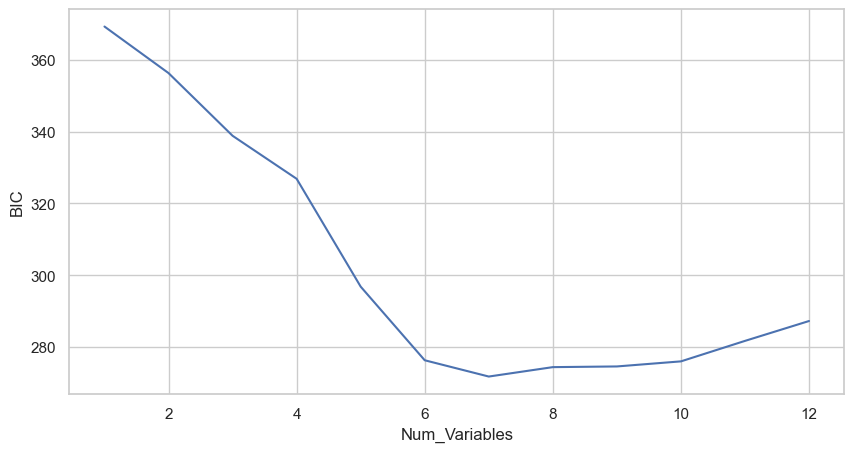

In [ ]:
sns.lineplot(data=BIC_models, x="Num_Variables", y="BIC")
plt.show()

In [ ]:
# Numero de variables optimo:
n_variables = BIC_models["BIC"].idxmin()+1
print("Numero de variables óptimo:")
n_variables

Numero de variables óptimo:


7

In [ ]:
# Calculamos el modelo con el RFE con el numero de variables seleccionadas
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg,n_variables)

rfe = rfe.fit(X_,y_)

C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jordi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of i

In [ ]:
# Seleccionar las variables de entrada del modelo de RFE
X_RFE = X_[X_.columns[rfe.support_]]
X_RFE.head()

,sex,cp,exng,oldpeak,slp,caa,thall
0,1,3,0,2.3,0,0,1
1,1,2,0,3.5,0,0,2
2,0,1,0,1.4,2,0,2
3,1,1,0,0.8,2,0,2
4,0,0,1,0.6,2,0,2


In [ ]:
# Calculo del modelo con las variables seleccionadas
logit_model_i = sm.Logit(y_, sm.add_constant(X_RFE)).fit()
logit_model_i.summary()

Optimization terminated successfully.
         Current function value: 0.372913
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 output   No. Observations:                  303
Model:                          Logit   Df Residuals:                      295
Method:                           MLE   Df Model:                            7
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                  0.4589
Time:                        10:10:10   Log-Likelihood:                -112.99
converged:                       True   LL-Null:                       -208.82
Covariance Type:            nonrobust   LLR p-value:                 6.708e-38
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8468      0.872      3.264      0.001       1.137       4.556
sex           -1.3652      0.409     -3.341      0.001      -2.166      -0.564
cp             0.8811      0.176      5.010      0.000       0.536       1.226
exng          -1.1795      0.379     -3.114      0.002      -1.922      -0.437
oldpeak       -0.6294      0.205     -3.069      0.002      -1.031      -0.227
slp            0.7367      0.327      2.251      0.024       0.095       1.378
caa           -0.8166      0.178     -4.577      0.000      -1.166      -0.467
thall         -0.8696      0.269     -3.228      0.001      -1.398      -0.342
==============================================================================
"""

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=10000).fit(X_RFE,y_)
print("Accuracy del modelo:")
clf.score(X_RFE, y_)

Accuracy del modelo:


0.8415841584158416

## Filtro multivariado: Recursive Feature elimination RFE

El recursive feature elimination trata de entrenar un algoritmo que tu le digas empezando con todas las variables.

De ese primer algoritmo calcula la importancia de cada variable.

La que tiene menos importancia la quita.

Y vuelve a entrenar un random forest sin esa variable.

Este proceso lo va repitiendo hasta llegar a solo 1 variable.

Calculamos el error que tiene ese random forest por cada número de variables.

Referencia: https://www.scikit-yb.org/en/latest/api/model_selection/rfecv.html


### RFE - Random Forest RF

In [ ]:
# Usar las variables de entrada sin estandarizar:

Optimal number of features : 13


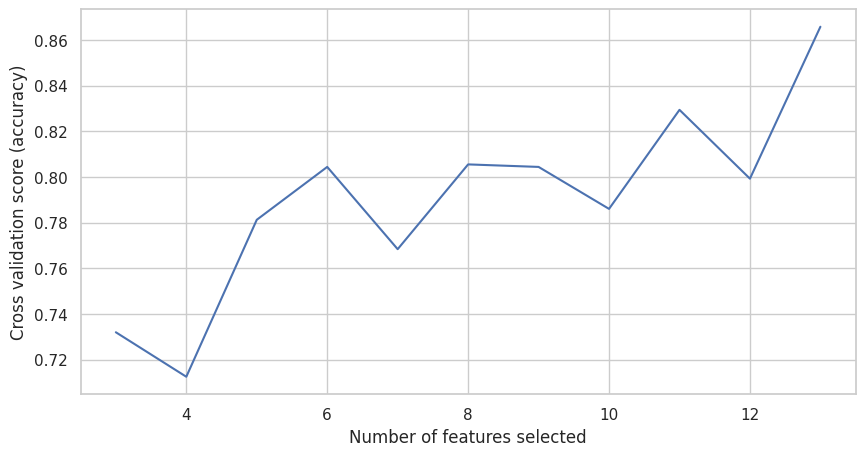

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = RandomForestClassifier(n_estimators=10)
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 3  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(10),
    scoring="recall",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [ ]:
# Instantiate RFECV visualizer with a linear SVM classifier
# rfecv.fit(X_, y_)
# rfecv.show

In [ ]:
# Numero de variables optimo:
n_variables =rfecv.n_features_
print("Numero de variables óptimo:")
n_variables

Numero de variables óptimo:


13

In [ ]:
X_.columns[rfecv.support_]

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

In [ ]:
# Las variables que escoges del RFE
X_RFE = X_[X_.columns[rfecv.support_]]
X_RFE.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### RFE - SVM

Optimal number of features : 11


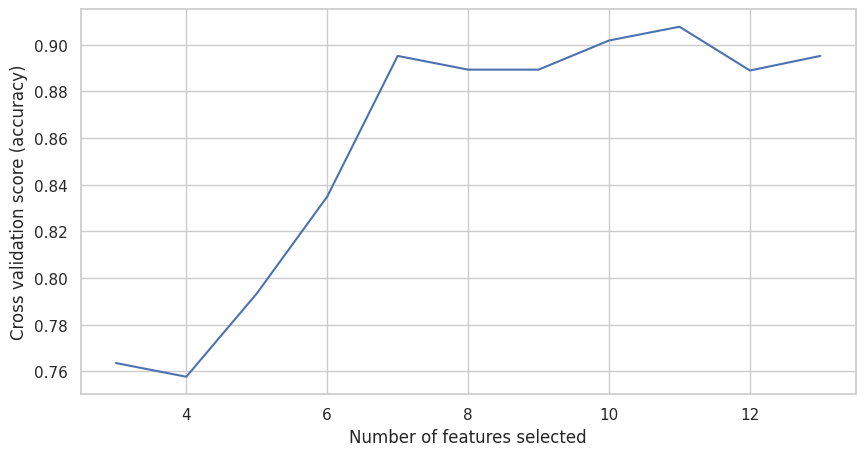

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications
min_features_to_select = 3  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(10),
    scoring="recall",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_, y_)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.cv_results_['mean_test_score']) + min_features_to_select),
    rfecv.cv_results_['mean_test_score'],
)
plt.show()

In [ ]:
# Numero de variables optimo:
n_variables =rfecv.n_features_
print("Numero de variables óptimo:")
n_variables

Numero de variables óptimo:


11

In [ ]:
# Las variables que escoges del RFE
X_RFE = X_[X_.columns[rfecv.support_]]
X_RFE.head()

,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,1,3,145,1,0,150,0,2.3,0,0,1
1,1,2,130,0,1,187,0,3.5,0,0,2
2,0,1,130,0,0,172,0,1.4,2,0,2
3,1,1,120,0,1,178,0,0.8,2,0,2
4,0,0,120,0,1,163,1,0.6,2,0,2


## Filtro multivariado - Boruta

In [ ]:
!pip install Boruta

In [ ]:
from boruta import BorutaPy

np.int = np.int32
np.float = np.float64
np.bool = np.bool_

# definimos el random forest clasificador
randomForest = RandomForestClassifier(n_jobs = -1,class_weight='balanced', max_depth = 5)
randomForest.fit(X_, y_)

# define Boruta feature selection
feature_selection = BorutaPy(randomForest, n_estimators = 'auto', verbose = 1,
                             random_state = 16,max_iter= 200 )

feature_selection.fit(np.array(X_), np.array(y_))

Iteration: 1 / 200
Iteration: 2 / 200
Iteration: 3 / 200
Iteration: 4 / 200
Iteration: 5 / 200
Iteration: 6 / 200
Iteration: 7 / 200
Iteration: 8 / 200
Iteration: 9 / 200
Iteration: 10 / 200
Iteration: 11 / 200
Iteration: 12 / 200
Iteration: 13 / 200
Iteration: 14 / 200
Iteration: 15 / 200
Iteration: 16 / 200
Iteration: 17 / 200
Iteration: 18 / 200
Iteration: 19 / 200
Iteration: 20 / 200
Iteration: 21 / 200
Iteration: 22 / 200
Iteration: 23 / 200
Iteration: 24 / 200
Iteration: 25 / 200
Iteration: 26 / 200
Iteration: 27 / 200
Iteration: 28 / 200
Iteration: 29 / 200
Iteration: 30 / 200
Iteration: 31 / 200
Iteration: 32 / 200
Iteration: 33 / 200
Iteration: 34 / 200
Iteration: 35 / 200
Iteration: 36 / 200
Iteration: 37 / 200
Iteration: 38 / 200
Iteration: 39 / 200
Iteration: 40 / 200
Iteration: 41 / 200
Iteration: 42 / 200
Iteration: 43 / 200
Iteration: 44 / 200
Iteration: 45 / 200
Iteration: 46 / 200
Iteration: 47 / 200
Iteration: 48 / 200
Iteration: 49 / 200
Iteration: 50 / 200
Iteration

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=84, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7E3360873340),
         max_iter=200, n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7E3360873340, verbose=1)

In [ ]:
# Getting feature ranking
feature_selection.ranking_

array([1, 3, 1, 2, 4, 6, 5, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
# Creating list of varibale name, ranks, and final decision using zip
feature_rankings = list(zip(X_.columns,
                           feature_selection.ranking_,
                           feature_selection.support_))
pd.DataFrame(feature_rankings)

,0,1,2
0,age,1,True
1,sex,3,False
2,cp,1,True
3,trtbps,2,False
4,chol,4,False
5,fbs,6,False
6,restecg,5,False
7,thalachh,1,True
8,exng,1,True
9,oldpeak,1,True


In [ ]:
# seleccionamos las variables

# Seleccionamos las variables con Boruta
X_Boruta = X_.loc[:,feature_selection.support_].copy()
X_Boruta.head()

,age,cp,thalachh,exng,oldpeak,slp,caa,thall
0,63,3,150,0,2.3,0,0,1
1,37,2,187,0,3.5,0,0,2
2,41,1,172,0,1.4,2,0,2
3,56,1,178,0,0.8,2,0,2
4,57,0,163,1,0.6,2,0,2


# Training

Para entrenar necesitamos seguir unos pasos muy mecánicos pero siempre hay que estar abierto a probar y testear hasta encontra la "mejor" opción.

Los pasos del training para un caso de clasificación:

1. Data split - partición de los datos
2. Balancear los datos
3. Definir el training: tipo de subsampling, tipos de transformaciones
4. Training de algoritmos sencillos - baseline
5. Trainign de algoritmos avanzados (ENSEMBLE ALGORITHMS - boosting o de bagging)
6. Optimizar del mejor algoritmo sencillo
7. Optimizar el mejor algoritmo avanzado

## Data split - partición de los datos

Normalmente 70-30 u 80-20.

In [ ]:
# Seleccionamos los datos de la seleccion de variables.
# Un vector de nombres de las columnas

#X_sel = X_b[X_.columns[feature_selection.support_]] # las variables seleccionadas con Boruta

X_sel = X_Boruta.copy()

In [ ]:
validation_size = 0.20 # el % de datos para validar
seed = 7 # el numero aleatorio para generar la partición
X_train, X_validation, Y_train, Y_validation = train_test_split(X_sel, y_, test_size=validation_size, random_state=seed)

## Balancear los datos

Vamos a utilizar el balanceo downsampling, es decir, quitar observaciones de aquellos grupo o grupo con mayor número de muestras.

Y dejar el grupo más pequeño sin manipular.

Con esta estrategia lo que conseguimos es no generar ruido, ya que no nos inventamos nuevos datos.

El link de las funciones de balanceo de datos: https://imbalanced-learn.org/stable/introduction.html

In [ ]:
# Copio en un nuevo data frame los datos originiales para entrenar
X_dum = X_train.copy()
idx = X_train.index
X_dum['idx'] = idx
X_dum.head()

,age,cp,thalachh,exng,oldpeak,slp,caa,thall,idx
245,48,0,166,0,0.5,1,0,3,245
267,49,2,126,0,0.8,2,3,2,267
268,54,0,116,1,3.2,1,2,2,268
150,66,0,138,0,2.3,2,0,1,150
168,63,0,147,0,1.4,1,1,3,168


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN

# Variable para controlar el método de balanceo
# Puede ser 'undersampling', 'oversampling', 'smotetomek', o 'smoteenn'
balanceo_tipo = 'smoteenn'  # Cambiar según se requiera

# Realizar balanceo según el tipo especificado
if balanceo_tipo == 'undersampling':
    rus = RandomUnderSampler(random_state=0)
    X_b, y_b = rus.fit_resample(X_dum, Y_train)

elif balanceo_tipo == 'oversampling':
    ros = RandomOverSampler(random_state=0)
    X_b, y_b = ros.fit_resample(X_dum, Y_train)

elif balanceo_tipo == 'smotetomek':
    smote_tomek = SMOTETomek(random_state=0)
    X_b, y_b = smote_tomek.fit_resample(X_dum, Y_train)

elif balanceo_tipo == 'smoteenn':
    smote_enn = SMOTEENN(random_state=0)
    X_b, y_b = smote_enn.fit_resample(X_dum, Y_train)

else:
    raise ValueError("Tipo de balanceo no reconocido.")

# Balanceo downsampling:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_b, y_b = rus.fit_resample(X_dum, Y_train)
X_b.head()

,age,cp,thalachh,exng,oldpeak,slp,caa,thall,idx
0,48,0,166,0,0.5,1,0,3,245
1,49,2,126,0,0.8,2,3,2,267
2,54,0,116,1,3.2,1,2,2,268
3,63,0,147,0,1.4,1,1,3,168
4,46,0,144,0,0.8,2,0,3,270


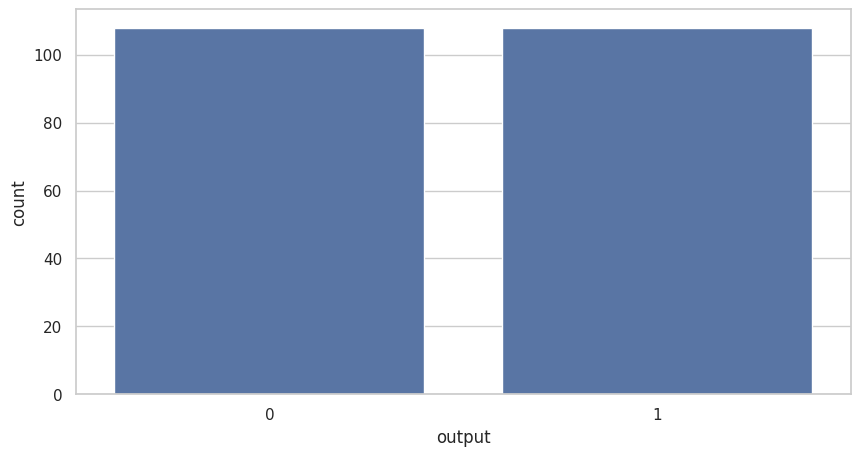

In [ ]:
# Comprobar el balanceo de los datos:
data_balanceado = pd.DataFrame(y_b)

# Barplot de la variable output- frecuencias absolutas
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=respuesta[0],data = data_balanceado)
plt.show()

In [ ]:
# Me quedo con el vector identificado de las filas que tengo en el data frame de balanceo
idx_b = X_b['idx'] # guardo el identificador de la fila que tengo en los datos de balanceo
X_b = X_b.drop("idx",axis=1) # quito la columna que es una dummy
idx_b

0      245
1      267
2      268
3      168
4      270
      ... 
211     25
212     79
213    106
214    140
215     98
Name: idx, Length: 216, dtype: int64

In [ ]:
# Creo un data frame de las entradas con los datos que he quitado del balanceo
X_no_used = X_.drop(idx_b,axis = 0)
X_no_used.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2


In [ ]:
# Creo una nueva variable de salida con los datos que he quitado en el balanceo
y_no_used = y_.drop(idx_b,axis = 0)
y_no_used.head()

2     1
3     1
14    1
17    1
18    1
Name: output, dtype: int64

In [ ]:
# Renombrar los datos balanceados de training como X_train y Y_train:
X_train = X_b.copy()
Y_train = y_b.copy()

## Definir las características del training

Hay varias opciones de subsmapling para evitar el overfitting del algoritmo.

    •	Crear 10 grupos de 3 repeticiones – k-fold
    •	Crear 100 nuevos grupos generando la muestra a partir de la distribución de training data- bootstraping
    •	Quitar una variable de entrada cada vez – LOOCV

El más común y utilizado es el k-fold validation.

Las trasnformaciones más comunes son:
- La estandarización de los datos
- Las trasnformaciones de Yule-Johnson y Box-Cox (normalizar los datos para variables cuantitativas y positivas)
- El principal component analysis (PCA)


In [ ]:
# Defenimos el subsampling y el seed number
num_folds = 5
seed = 7
scoring = 'accuracy'

## Training de algoritmos básicos sin ESTANDARIZAR

Primer cálculo de algoritmos de baseline.
A partir de estos resultados lo más probable es que los mejoremos.

Hacemos un primer cálculo sin estandarizar.

Estos son los algorimos básicos de baseline que te propongo:
- Logistic regresion - LR
- Logistic regresion con regularización elástica - LR_ELASTIC
- Linear discriminant analysis - LDA
- Los k vecinos mas cercanos - KNN
- Naive bayes - NB
- Árbol de clasificación - CART
- Support vector machine radial - SVM

In [ ]:
# Definimos los algoritmos basicos
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
#models.append(('LR_ELASTIC', LogisticRegression(penalty = 'elasticnet')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('SVM_Linear', SVC(kernel='linear')))  # SVM con kernel lineal

In [ ]:
results = []
names = []

# evaluamos los algoritmos basicos
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print('**************************************')


**************************************
LR
Predicción de Training:
LR: 0.842495 (0.064977)
Predicción de Validación:
0.7540983606557377
[[18 12]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61

**************************************
**************************************
LDA
Predicción de Training:
LDA: 0.842495 (0.061558)
Predicción de Validación:
0.7704918032786885
[[19 11]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.72      0.90      0.80        31

    accuracy                           0.77        61
   macro avg       0.79      0.77      0.77        61
weighted avg       0.79      0.77      0.77        6

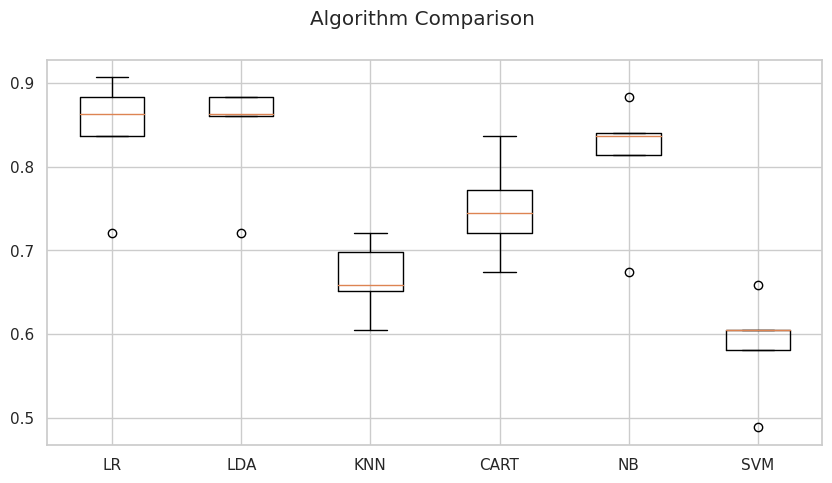

In [ ]:
# Comparamos los algoritmos
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Training de algoritmos básicos ESTANDARIZADOS

Primer cálculo de algoritmos de baseline.
A partir de estos resultados lo más probable es que los mejoremos.

Hacemos un primer cálculo sin estandarizar.

Estos son los algorimos básicos de baseline que te propongo:
- Logistic regresion - LR
- Logistic regresion con regularización elástica - LR_ELASTIC
- Linear discriminant analysis - LDA
- Los k vecinos mas cercanos - KNN
- Naive bayes - NB
- Árbol de clasificación - CART
- Support vector machine radial - SVM

In [ ]:
# Definimos el pipeline con estandarizacion y el modelo:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('ScaledSVM_Linear', Pipeline([('Scaler', StandardScaler()),('SVM_Linear', SVC(kernel='linear'))])))

In [ ]:
results = []
names = []

# evaluamos los algoritmos basicos
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print('**************************************')


**************************************
ScaledLR
Predicción de Training:
ScaledLR: 0.842600 (0.068006)
Predicción de Validación:
0.7868852459016393
[[20 10]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.87      0.67      0.75        30
           1       0.74      0.90      0.81        31

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61

**************************************
**************************************
ScaledLDA
Predicción de Training:
ScaledLDA: 0.842495 (0.061558)
Predicción de Validación:
0.7704918032786885
[[19 11]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        30
           1       0.72      0.90      0.80        31

    accuracy                           0.77        61
   macro avg       0.79      0.77      0.77        61
weighted avg       0.79     

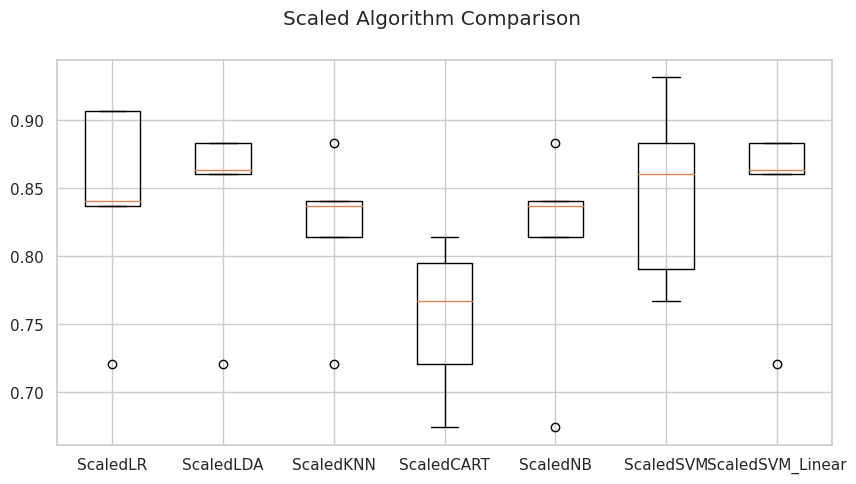

In [ ]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

En este caso, mirando algoritmos básicos, nos podemos quedar con LR, LDA.

## Entrenamiento algoritmos de ensemble - avanzados

Los algoritmos avanzados que vamos a utilizar son los siguientes:
- Random Forest - RF
- Ada Boost Classifier - AB
- Stochastic Gradient Boosting - GBM
- Extra tree classifier - ET
- XGBoost
- LightBoost

In [ ]:
# Definimos los algoritmos
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
#ensembles.append(('XGB', XGBClassifier()))

In [ ]:
results = []
names = []

# evaluamos los algoritmos basicos
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print('**************************************')


**************************************
AB
Predicción de Training:
AB: 0.809937 (0.048129)
Predicción de Validación:
0.7540983606557377
[[20 10]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

**************************************
**************************************
GBM
Predicción de Training:
GBM: 0.838161 (0.031572)
Predicción de Validación:
0.7213114754098361
[[19 11]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.76      0.63      0.69        30
           1       0.69      0.81      0.75        31

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        6

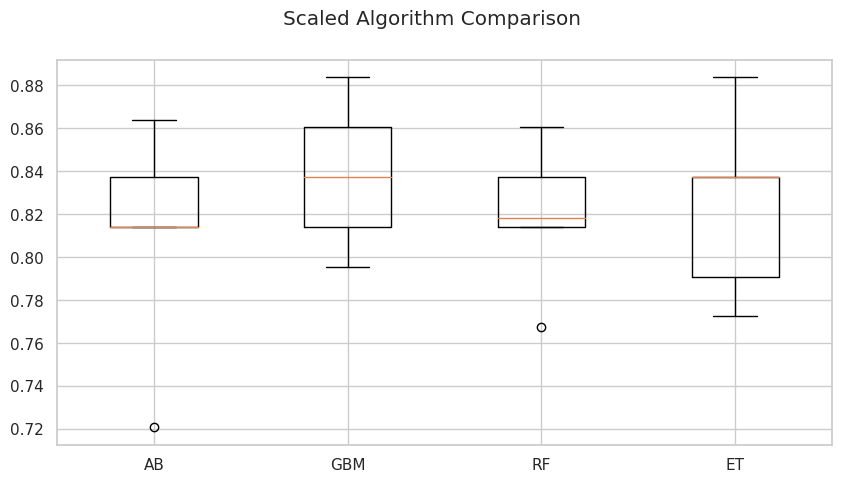

In [ ]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Training algoritmos de esemble ESTANDARIZADOS

Los algoritmos avanzados que vamos a utilizar son los siguientes:
- Random Forest - RF
- Ada Boost Classifier - AB
- Stochastic Gradient Boosting - GBM
- Extra tree classifier - ET
- XGBoost
- LightBoost

In [ ]:
# Definimos el pipeline con estandarizacion y el modelo:
pipelines = []
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier(n_estimators=10))])))
pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', GradientBoostingClassifier())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', KNeighborsClassifier())])))
pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier(n_estimators=10))])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()), ('XGB', XGBClassifier())])))  # Pipeline para XGBoost

In [ ]:
results = []
names = []

# evaluamos los algoritmos basicos
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('**************************************')
    print(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('Predicción de Training:')
    print(msg)
    model.fit(X_train, Y_train) # fit del modelo
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model.predict(X_validation) # prediccion con los datos validacion
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print('**************************************')

**************************************
ScaledRF
Predicción de Training:
ScaledRF: 0.823890 (0.043695)
Predicción de Validación:
0.7377049180327869
[[21  9]
 [ 7 24]]
              precision    recall  f1-score   support

           0       0.75      0.70      0.72        30
           1       0.73      0.77      0.75        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

**************************************
**************************************
ScaledAB
Predicción de Training:
ScaledAB: 0.833510 (0.029595)
Predicción de Validación:
0.7377049180327869
[[19 11]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.79      0.63      0.70        30
           1       0.70      0.84      0.76        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.73        61
weighted avg       0.75      0

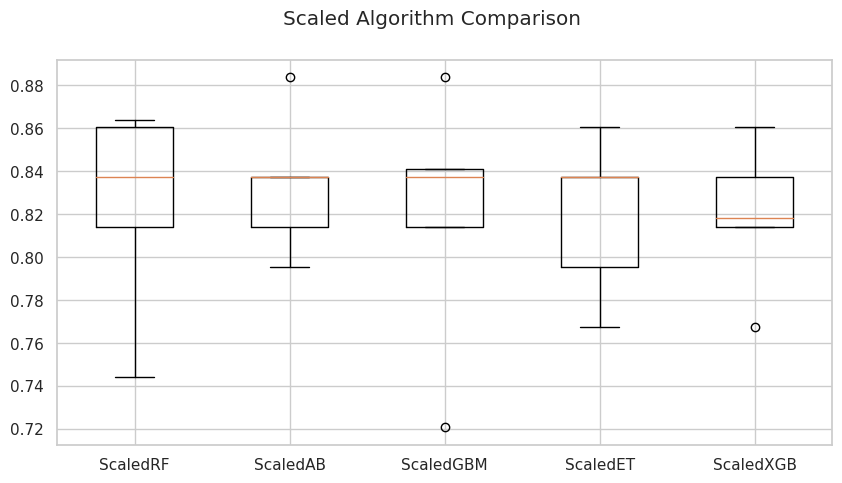

In [ ]:
# Comparamos algoritmos
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## EJEMPLO: Tunning - optimización de un ET + Estandarizado

Buscar el mejor algoritmo usando la "fuerza bruta", es decir, pruebo una batería de hiperparámetros para optimizar el algoritmo.

Optimizar el algoritmo `ExtraTreesClassifier` de `scikit-learn` implica encontrar los hiperparámetros adecuados que mejor se ajusten a tus datos. Aquí te ofrezco algunos consejos:

1. **Entender tus Datos**: Conoce bien tus datos antes de empezar a ajustar los hiperparámetros. Esto incluye comprender la distribución de las características, la presencia de valores atípicos, y la relación entre las características y la variable objetivo.

2. **Uso de Grid Search y Random Search**:
   - **Grid Search**: Prueba una variedad de combinaciones de hiperparámetros y elige la mejor. Puede ser lento, pero es exhaustivo.
   - **Random Search**: Prueba combinaciones aleatorias de hiperparámetros. Es menos exhaustivo, pero puede ser más rápido y descubrir buenas combinaciones que podrían no ser consideradas por el Grid Search.

3. **Validación Cruzada**: Utiliza la validación cruzada para evaluar el desempeño de los modelos con distintas configuraciones de hiperparámetros. Esto ayuda a asegurar que el modelo no esté sobreajustado a un subconjunto específico de tus datos.

4. **Ajustar `n_estimators` y `max_features`**:
   - **n_estimators**: Comienza con un valor más bajo, como 100, y aumenta gradualmente para ver cómo afecta el rendimiento. A menudo, más árboles mejoran el desempeño, pero también aumentan el tiempo de cálculo.
   - **max_features**: Varía este parámetro. Los valores comunes son "auto", "sqrt" o un porcentaje del total de las características. Diferentes valores pueden tener un impacto significativo en el rendimiento y la sobreajuste.

5. **Profundidad del Árbol**:
   - Experimenta con `max_depth`. Árboles más profundos pueden capturar más señales, pero también pueden llevar a un sobreajuste.

6. **Muestra y Poda**:
   - Ajusta `min_samples_split` y `min_samples_leaf` para controlar el tamaño de las muestras en los nodos y prevenir el sobreajuste.
   - Usa `ccp_alpha` para la poda de los árboles y reducir la complejidad del modelo.

7. **Manejo de Clases Desequilibradas**: Si trabajas con clases desequilibradas, ajusta el parámetro `class_weight` para que el modelo tenga en cuenta este desequilibrio.

8. **Regularización**: Considera la regularización mediante hiperparámetros como `min_impurity_decrease` para evitar el sobreajuste.

9. **Pruebas Iterativas**: La optimización de hiperparámetros suele ser un proceso iterativo. No todas las combinaciones funcionarán bien con todos los conjuntos de datos, así que experimenta y ajusta según los resultados.

10. **Uso de Herramientas de Automatización**: Considera el uso de herramientas de automatización como `Optuna` o `Hyperopt` que pueden ayudar a encontrar los mejores hiperparámetros de manera más eficiente.

Recuerda que cada conjunto de datos es único, por lo que no hay una solución única para la optimización de hiperparámetros. La experimentación y la validación son clave.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


pipeline = Pipeline([('Scaler', StandardScaler()),('model', ExtraTreesClassifier())])

cv = StratifiedKFold(n_splits=3)
param_grid = {
    "model__random_state": [0],
    "model__n_estimators": [50,75,100,150],
    "model__max_depth": [3,5]
}
searchCV = GridSearchCV(estimator=pipeline, scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True)

# WARNING: This could take some time to run.
searchCV.fit(X_train, Y_train)

print('Best params:', searchCV.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best params: {'model__max_depth': 5, 'model__n_estimators': 75, 'model__random_state': 0}


In [ ]:
# estimate accuracy on training dataset
predictions = searchCV.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

# estimate accuracy on validation dataset
predictions = searchCV.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8935185185185185
[[ 92  16]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       108
           1       0.86      0.94      0.90       108

    accuracy                           0.89       216
   macro avg       0.90      0.89      0.89       216
weighted avg       0.90      0.89      0.89       216

0.7377049180327869
[[18 12]
 [ 4 27]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        30
           1       0.69      0.87      0.77        31

    accuracy                           0.74        61
   macro avg       0.76      0.74      0.73        61
weighted avg       0.75      0.74      0.73        61



## EJEMPLO: Tunning - optimización Gradient Boosting GBM estandarizado

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


pipeline = Pipeline([('Scaler', StandardScaler()),('model', GradientBoostingClassifier())])

cv = StratifiedKFold(n_splits=3)
param_grid = {
    "model__random_state": [0],
    "model__n_estimators": [340, 360, 380],
    "model__max_depth": [10,15,25, 30, 35]
}
searchCV = GridSearchCV(estimator=pipeline, scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True)

# WARNING: This could take some time to run.
searchCV.fit(X_train, Y_train)

print('Best params:', searchCV.best_params_)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best params: {'model__max_depth': 10, 'model__n_estimators': 340, 'model__random_state': 0}


In [ ]:
# estimate accuracy on validation dataset
predictions = searchCV.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

# estimate accuracy on validation dataset
predictions = searchCV.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[108   0]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

0.7540983606557377
[[21  9]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



## EJEMPLO: Tunning - optimización RANDOM FOREST sin estandarizar

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold


model = RandomForestClassifier()

cv = StratifiedKFold(n_splits=3)
param_grid = {
    "random_state": [0],
    "n_estimators": [340, 360, 380,390,400],
    "max_depth": [10,15,25, 30, 35]
}
searchCV = GridSearchCV(estimator=model, scoring='accuracy', cv=cv, param_grid=param_grid, verbose=True)

# WARNING: This could take some time to run.
searchCV.fit(X_train, Y_train)

print('Best params:', searchCV.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Best params: {'max_depth': 10, 'n_estimators': 340, 'random_state': 0}


In [ ]:
# estimate accuracy on validation dataset
predictions = searchCV.predict(X_train)
print(accuracy_score(Y_train, predictions))
print(confusion_matrix(Y_train, predictions))
print(classification_report(Y_train, predictions))

# estimate accuracy on validation dataset
predictions = searchCV.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
[[108   0]
 [  0 108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00       108

    accuracy                           1.00       216
   macro avg       1.00      1.00      1.00       216
weighted avg       1.00      1.00      1.00       216

0.7704918032786885
[[21  9]
 [ 5 26]]
              precision    recall  f1-score   support

           0       0.81      0.70      0.75        30
           1       0.74      0.84      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



# Finalizar el modelo

Hemos seleccionado el logistic regression ya que tenemos pocos datos y los algoritmos más avanzados no funcionan tan bien.

Además vemos que tiene el mejor Accuracy de training y por definición los modelos estadísticos (logistic regression) no tienden al overfitting.

Calcularemos la importancia de cada variables:

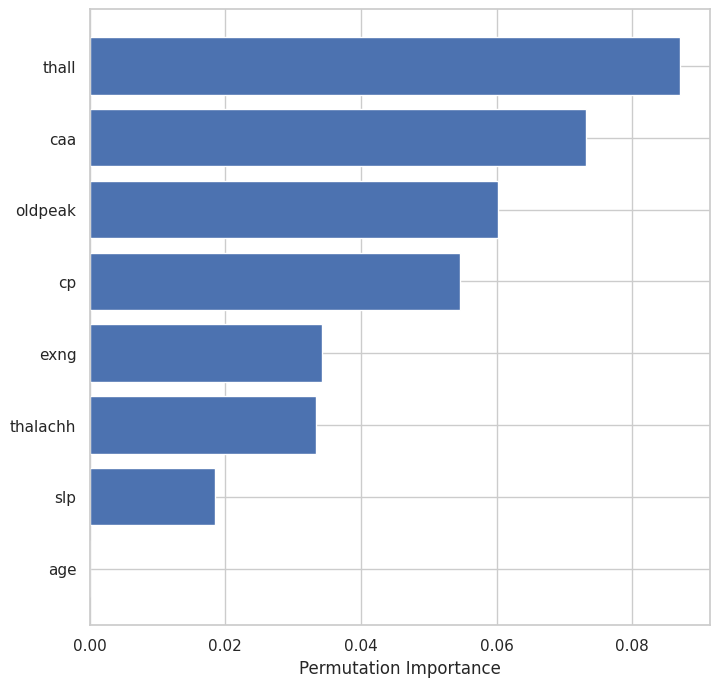

In [ ]:
## Importancia de las variables SVM
from sklearn.inspection import permutation_importance

model_fit = LogisticRegression(solver='liblinear').fit(X_train, Y_train)

perm_importance = permutation_importance(model_fit, X_train, Y_train) # Calculo de la importancia de las variables
sorted_idx = perm_importance.importances_mean.argsort() # ordenar las variables por orden de importancia
features_names = X_train.columns # nombres de las variables

# Grafico de la importancia de las variables:
fig = plt.figure(figsize=(8,8))
plt.barh(features_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
    print('**************************************')
    print('Predicción de Training:')
    predictions = model_fit.predict(X_train) # calculamos los valores de prediccion
    print(accuracy_score(Y_train, predictions))
    print(confusion_matrix(Y_train, predictions))
    print(classification_report(Y_train, predictions))
    # estimate accuracy on validation dataset
    print('Predicción de Validación:')
    predictions = model_fit.predict(X_validation) # calculamos los valores de prediccion
    print(accuracy_score(Y_validation, predictions))
    print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_validation, predictions))
    print('**************************************')

**************************************
Predicción de Training:
0.8703703703703703
[[91 17]
 [11 97]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       108
           1       0.85      0.90      0.87       108

    accuracy                           0.87       216
   macro avg       0.87      0.87      0.87       216
weighted avg       0.87      0.87      0.87       216

Predicción de Validación:
0.7540983606557377
[[18 12]
 [ 3 28]]
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61

**************************************


# Usar el algoritmo para nuevas predicciones

Leer nuevos datos en el mismo formato y las mismas variables de los datos de training.

Y con esto podrías usar el algoritmo para realizar las estimaciones / predicciones.

In [ ]:
# Predicción del gupo:
predictions = model_fit.predict(X_train)
predictions


array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [ ]:
# Predicción de la probabilidad de pertenencia al grupo:
probability_predictions = model_fit.predict_proba(X_train)
probability_predictions*100

array([[5.36843960e+01, 4.63156040e+01],
       [6.29433959e+01, 3.70566041e+01],
       [9.84015138e+01, 1.59848624e+00],
       [8.67217339e+01, 1.32782661e+01],
       [5.74952556e+01, 4.25047444e+01],
       [5.62568022e+01, 4.37431978e+01],
       [4.60737789e+00, 9.53926221e+01],
       [9.90092089e+01, 9.90791142e-01],
       [1.40436721e+01, 8.59563279e+01],
       [9.80828083e+01, 1.91719172e+00],
       [7.63446126e+01, 2.36553874e+01],
       [9.66164935e+01, 3.38350653e+00],
       [9.76149405e+01, 2.38505946e+00],
       [6.19207613e+01, 3.80792387e+01],
       [9.84539899e+01, 1.54601008e+00],
       [9.72717443e+01, 2.72825571e+00],
       [9.61686916e+01, 3.83130844e+00],
       [9.80900454e+01, 1.90995464e+00],
       [8.35064224e+01, 1.64935776e+01],
       [8.24420782e+01, 1.75579218e+01],
       [7.32091149e+01, 2.67908851e+01],
       [9.73315883e+01, 2.66841169e+00],
       [8.96302481e+01, 1.03697519e+01],
       [8.90796014e+01, 1.09203986e+01],
       [8.206729